______  ___     ______                        _________
___   |/  /________  /_______ _______ ______________  /
__  /|_/ /_  __ \_  __ \  __ `/_  __ `__ \  _ \  __  / 
_  /  / / / /_/ /  / / / /_/ /_  / / / / /  __/ /_/ /  
/_/  /_/  \____//_/ /_/\__,_/ /_/ /_/ /_/\___/\__,_/   
                                                       
_____________ _________      ___________        _________            
___    |__  /_______  /_____ ___  /__  /_______ ______  /____________
__  /| |_  __ \  __  /_  __ `/_  /__  //_/  __ `/  __  /_  _ \_  ___/
_  ___ |  /_/ / /_/ / / /_/ /_  / _  ,<  / /_/ // /_/ / /  __/  /    
/_/  |_/_.___/\__,_/  \__,_/ /_/  /_/|_| \__,_/ \__,_/  \___//_/     
                                                                     



## Import

In [2]:
# import necessary modules
import numpy as np
import pandas as pd

from math import log
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from keras import optimizers
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.layers import GRU

from keras.layers import Bidirectional
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, LSTM

import keras.layers
import tensorflow as tf
import keras.backend as K
from keras import optimizers
from typing import List, Tuple
from keras.models import Model , Sequential
from keras.utils.vis_utils import plot_model
from keras.layers import TimeDistributed, MaxPooling1D
from keras.layers import LSTM, Conv1D,MaxPool1D, concatenate, GlobalMaxPooling1D, GlobalAveragePooling1D
from keras.layers import Lambda, SpatialDropout1D, Convolution1D, Dense, Activation, Input, Flatten, Dropout


import optuna
from optuna.trial import TrialState
from tensorflow.keras.optimizers import Adam 
from optuna.integration import KerasPruningCallback

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Reading data

In [3]:
# Reading generated power (Solar and wind) data
# Dataset link : https://data.open-power-system-data.org/time_series/2020-10-06

data_path = r"C:\Users\Mohamed\OneDrive\Desktop\Graduation project\opsd-time_series-2020-10-06\time_series_60min_singleindex.csv"
kaggle_path = r"../input/wind-and-solar-generation-from-weather-data/time_series_60min_singleindex.csv"

df = pd.read_csv(data_path,
                 usecols=(lambda s: s.startswith('utc') | s.startswith('DE')),
                 parse_dates=[0], index_col=0)

In [4]:
df.head()

,DE_load_actual_entsoe_transparency,DE_load_forecast_entsoe_transparency,DE_solar_capacity,DE_solar_generation_actual,DE_solar_profile,DE_wind_capacity,DE_wind_generation_actual,DE_wind_profile,DE_wind_offshore_capacity,DE_wind_offshore_generation_actual,...,DE_tennet_load_actual_entsoe_transparency,DE_tennet_load_forecast_entsoe_transparency,DE_tennet_solar_generation_actual,DE_tennet_wind_generation_actual,DE_tennet_wind_offshore_generation_actual,DE_tennet_wind_onshore_generation_actual,DE_transnetbw_load_actual_entsoe_transparency,DE_transnetbw_load_forecast_entsoe_transparency,DE_transnetbw_solar_generation_actual,DE_transnetbw_wind_onshore_generation_actual
utc_timestamp,,,,,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,NaN,NaN,37248.0,NaN,NaN,27913.0,NaN,NaN,667.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 00:00:00+00:00,41151.0,39723.0,37248.0,NaN,NaN,27913.0,8852.0,0.3171,667.0,517.0,...,13841.0,13362.0,NaN,3866.0,469.0,3398.0,5307.0,4703.0,NaN,5.0
2015-01-01 01:00:00+00:00,40135.0,38813.0,37248.0,NaN,NaN,27913.0,9054.0,0.3244,667.0,514.0,...,13267.0,12858.0,NaN,3974.0,466.0,3508.0,5087.0,4562.0,NaN,7.0
2015-01-01 02:00:00+00:00,39106.0,38490.0,37248.0,NaN,NaN,27913.0,9070.0,0.3249,667.0,518.0,...,12702.0,12611.0,NaN,4194.0,470.0,3724.0,4906.0,4517.0,NaN,8.0
2015-01-01 03:00:00+00:00,38765.0,38644.0,37248.0,NaN,NaN,27913.0,9163.0,0.3283,667.0,520.0,...,12452.0,12490.0,NaN,4446.0,473.0,3973.0,4865.0,4601.0,NaN,11.0


Text(0.5, 1.0, 'Actual wind generation')

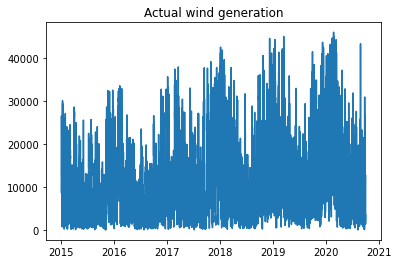

In [5]:
plt.plot(df.index, df['DE_wind_generation_actual'])
plt.title('Actual wind generation')

Text(0.5, 1.0, 'Actual solar generation')

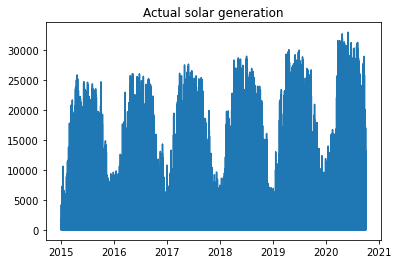

In [6]:
plt.plot(df.index, df['DE_solar_generation_actual'])
plt.title('Actual solar generation')

In [7]:
# As we see in the last two graphs , The wind and solar power aer seasonal  

production_wind_solar = df[['DE_wind_generation_actual', 'DE_solar_generation_actual']]
production_wind_solar.head()

,DE_wind_generation_actual,DE_solar_generation_actual
utc_timestamp,,
2014-12-31 23:00:00+00:00,NaN,NaN
2015-01-01 00:00:00+00:00,8852.0,NaN
2015-01-01 01:00:00+00:00,9054.0,NaN
2015-01-01 02:00:00+00:00,9070.0,NaN
2015-01-01 03:00:00+00:00,9163.0,NaN


In [8]:
# Reading weather data to be combined with power data  
# https://data.open-power-system-data.org/weather_data/2020-09-16
# Metadata link : https://data.open-power-system-data.org/weather_data/2020-09-16/README.md


data_path = r"C:\Users\Mohamed\OneDrive\Desktop\Graduation project\opsd-weather_data-2020-09-16\weather_data.csv"
kaggle_path = r"../input/wind-and-solar-generation-from-weather-data/weather_data.csv"

weather = pd.read_csv(data_path, parse_dates=[0], index_col=0)
weather.head()

,AT_temperature,AT_radiation_direct_horizontal,AT_radiation_diffuse_horizontal,BE_temperature,BE_radiation_direct_horizontal,BE_radiation_diffuse_horizontal,BG_temperature,BG_radiation_direct_horizontal,BG_radiation_diffuse_horizontal,CH_temperature,...,RO_radiation_diffuse_horizontal,SE_temperature,SE_radiation_direct_horizontal,SE_radiation_diffuse_horizontal,SI_temperature,SI_radiation_direct_horizontal,SI_radiation_diffuse_horizontal,SK_temperature,SK_radiation_direct_horizontal,SK_radiation_diffuse_horizontal
utc_timestamp,,,,,,,,,,,,,,,,,,,,,
1980-01-01 00:00:00+00:00,-3.640,0.0,0.0,-0.720,0.0,0.0,4.664,0.0,0.0,-6.287,...,0.0,-3.945,0.0,0.0,-3.055,0.0,0.0,-4.648,0.0,0.0
1980-01-01 01:00:00+00:00,-3.803,0.0,0.0,-1.165,0.0,0.0,4.052,0.0,0.0,-6.602,...,0.0,-4.053,0.0,0.0,-3.272,0.0,0.0,-4.554,0.0,0.0
1980-01-01 02:00:00+00:00,-3.969,0.0,0.0,-1.434,0.0,0.0,3.581,0.0,0.0,-6.981,...,0.0,-4.129,0.0,0.0,-3.639,0.0,0.0,-4.455,0.0,0.0
1980-01-01 03:00:00+00:00,-4.076,0.0,0.0,-1.843,0.0,0.0,3.197,0.0,0.0,-7.368,...,0.0,-4.139,0.0,0.0,-4.202,0.0,0.0,-4.421,0.0,0.0
1980-01-01 04:00:00+00:00,-4.248,0.0,0.0,-2.094,0.0,0.0,2.750,0.0,0.0,-7.849,...,0.0,-4.239,0.0,0.0,-4.732,0.0,0.0,-4.449,0.0,0.0


In [9]:
# resampling weather data by day to make it ready to be combined with power data  

weather_by_day = weather.groupby(weather.index).mean()
weather_by_day.head()

,AT_temperature,AT_radiation_direct_horizontal,AT_radiation_diffuse_horizontal,BE_temperature,BE_radiation_direct_horizontal,BE_radiation_diffuse_horizontal,BG_temperature,BG_radiation_direct_horizontal,BG_radiation_diffuse_horizontal,CH_temperature,...,RO_radiation_diffuse_horizontal,SE_temperature,SE_radiation_direct_horizontal,SE_radiation_diffuse_horizontal,SI_temperature,SI_radiation_direct_horizontal,SI_radiation_diffuse_horizontal,SK_temperature,SK_radiation_direct_horizontal,SK_radiation_diffuse_horizontal
utc_timestamp,,,,,,,,,,,,,,,,,,,,,
1980-01-01 00:00:00+00:00,-3.640,0.0,0.0,-0.720,0.0,0.0,4.664,0.0,0.0,-6.287,...,0.0,-3.945,0.0,0.0,-3.055,0.0,0.0,-4.648,0.0,0.0
1980-01-01 01:00:00+00:00,-3.803,0.0,0.0,-1.165,0.0,0.0,4.052,0.0,0.0,-6.602,...,0.0,-4.053,0.0,0.0,-3.272,0.0,0.0,-4.554,0.0,0.0
1980-01-01 02:00:00+00:00,-3.969,0.0,0.0,-1.434,0.0,0.0,3.581,0.0,0.0,-6.981,...,0.0,-4.129,0.0,0.0,-3.639,0.0,0.0,-4.455,0.0,0.0
1980-01-01 03:00:00+00:00,-4.076,0.0,0.0,-1.843,0.0,0.0,3.197,0.0,0.0,-7.368,...,0.0,-4.139,0.0,0.0,-4.202,0.0,0.0,-4.421,0.0,0.0
1980-01-01 04:00:00+00:00,-4.248,0.0,0.0,-2.094,0.0,0.0,2.750,0.0,0.0,-7.849,...,0.0,-4.239,0.0,0.0,-4.732,0.0,0.0,-4.449,0.0,0.0


In [10]:
# Meging (Solar & wind) data with (weather) data

combined = pd.merge(production_wind_solar, weather_by_day, how='left', left_index=True, right_index=True)
combined.head()

,DE_wind_generation_actual,DE_solar_generation_actual,AT_temperature,AT_radiation_direct_horizontal,AT_radiation_diffuse_horizontal,BE_temperature,BE_radiation_direct_horizontal,BE_radiation_diffuse_horizontal,BG_temperature,BG_radiation_direct_horizontal,...,RO_radiation_diffuse_horizontal,SE_temperature,SE_radiation_direct_horizontal,SE_radiation_diffuse_horizontal,SI_temperature,SI_radiation_direct_horizontal,SI_radiation_diffuse_horizontal,SK_temperature,SK_radiation_direct_horizontal,SK_radiation_diffuse_horizontal
utc_timestamp,,,,,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,NaN,NaN,-6.495,0.0,0.0,0.100,0.0,0.0,-13.029,0.0,...,0.0,0.610,0.0,0.0,-11.515,0.0,0.0,-8.337,0.0,0.0
2015-01-01 00:00:00+00:00,8852.0,NaN,-6.503,0.0,0.0,-0.046,0.0,0.0,-13.350,0.0,...,0.0,0.690,0.0,0.0,-11.261,0.0,0.0,-8.272,0.0,0.0
2015-01-01 01:00:00+00:00,9054.0,NaN,-6.458,0.0,0.0,-0.302,0.0,0.0,-13.594,0.0,...,0.0,0.786,0.0,0.0,-10.975,0.0,0.0,-8.114,0.0,0.0
2015-01-01 02:00:00+00:00,9070.0,NaN,-6.253,0.0,0.0,-0.541,0.0,0.0,-13.781,0.0,...,0.0,0.946,0.0,0.0,-10.772,0.0,0.0,-7.898,0.0,0.0
2015-01-01 03:00:00+00:00,9163.0,NaN,-5.908,0.0,0.0,-0.794,0.0,0.0,-14.042,0.0,...,0.0,1.160,0.0,0.0,-10.667,0.0,0.0,-7.670,0.0,0.0


In [11]:
# Note | we have the solar and wind data from 01/01/2015 to 30/09/2020
#                   and temperature data from 01/01/1980 to 31/12/2019
#                   we should get the intersection between them to be able to create a powerful model
#                   The intersection between them is from 
#                                             01/01/2015 to 31/12/2019

combined = combined.loc[combined.index >= '2015-01-01 00:00:00+00:00', :]
combined = combined.loc[combined.index <= '2019-12-31 23:00:00+00:00', :]

combined.head()

,DE_wind_generation_actual,DE_solar_generation_actual,AT_temperature,AT_radiation_direct_horizontal,AT_radiation_diffuse_horizontal,BE_temperature,BE_radiation_direct_horizontal,BE_radiation_diffuse_horizontal,BG_temperature,BG_radiation_direct_horizontal,...,RO_radiation_diffuse_horizontal,SE_temperature,SE_radiation_direct_horizontal,SE_radiation_diffuse_horizontal,SI_temperature,SI_radiation_direct_horizontal,SI_radiation_diffuse_horizontal,SK_temperature,SK_radiation_direct_horizontal,SK_radiation_diffuse_horizontal
utc_timestamp,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00+00:00,8852.0,NaN,-6.503,0.0,0.0,-0.046,0.0,0.0,-13.350,0.0,...,0.0,0.690,0.0,0.0,-11.261,0.0,0.0,-8.272,0.0,0.0
2015-01-01 01:00:00+00:00,9054.0,NaN,-6.458,0.0,0.0,-0.302,0.0,0.0,-13.594,0.0,...,0.0,0.786,0.0,0.0,-10.975,0.0,0.0,-8.114,0.0,0.0
2015-01-01 02:00:00+00:00,9070.0,NaN,-6.253,0.0,0.0,-0.541,0.0,0.0,-13.781,0.0,...,0.0,0.946,0.0,0.0,-10.772,0.0,0.0,-7.898,0.0,0.0
2015-01-01 03:00:00+00:00,9163.0,NaN,-5.908,0.0,0.0,-0.794,0.0,0.0,-14.042,0.0,...,0.0,1.160,0.0,0.0,-10.667,0.0,0.0,-7.670,0.0,0.0
2015-01-01 04:00:00+00:00,9231.0,NaN,-5.516,0.0,0.0,-1.053,0.0,0.0,-14.340,0.0,...,0.0,1.382,0.0,0.0,-10.467,0.0,0.0,-7.399,0.0,0.0


In [12]:
combined.isnull().sum()

DE_wind_generation_actual           74
DE_solar_generation_actual         103
AT_temperature                       0
AT_radiation_direct_horizontal       0
AT_radiation_diffuse_horizontal      0
                                  ... 
SI_radiation_direct_horizontal       0
SI_radiation_diffuse_horizontal      0
SK_temperature                       0
SK_radiation_direct_horizontal       0
SK_radiation_diffuse_horizontal      0
Length: 86, dtype: int64

In [13]:
# There are some nulls found should be filled by the mean of the same column

combined["DE_wind_generation_actual" ].fillna(combined["DE_wind_generation_actual" ].mean(), inplace=True)
combined["DE_solar_generation_actual"].fillna(combined["DE_solar_generation_actual"].mean(), inplace=True)

combined.isnull().sum()

DE_wind_generation_actual          0
DE_solar_generation_actual         0
AT_temperature                     0
AT_radiation_direct_horizontal     0
AT_radiation_diffuse_horizontal    0
                                  ..
SI_radiation_direct_horizontal     0
SI_radiation_diffuse_horizontal    0
SK_temperature                     0
SK_radiation_direct_horizontal     0
SK_radiation_diffuse_horizontal    0
Length: 86, dtype: int64

In [14]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43824 entries, 2015-01-01 00:00:00+00:00 to 2019-12-31 23:00:00+00:00
Data columns (total 86 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   DE_wind_generation_actual        43824 non-null  float64
 1   DE_solar_generation_actual       43824 non-null  float64
 2   AT_temperature                   43824 non-null  float64
 3   AT_radiation_direct_horizontal   43824 non-null  float64
 4   AT_radiation_diffuse_horizontal  43824 non-null  float64
 5   BE_temperature                   43824 non-null  float64
 6   BE_radiation_direct_horizontal   43824 non-null  float64
 7   BE_radiation_diffuse_horizontal  43824 non-null  float64
 8   BG_temperature                   43824 non-null  float64
 9   BG_radiation_direct_horizontal   43824 non-null  float64
 10  BG_radiation_diffuse_horizontal  43824 non-null  float64
 11  CH_temperature                   

In [15]:
combined.head()

,DE_wind_generation_actual,DE_solar_generation_actual,AT_temperature,AT_radiation_direct_horizontal,AT_radiation_diffuse_horizontal,BE_temperature,BE_radiation_direct_horizontal,BE_radiation_diffuse_horizontal,BG_temperature,BG_radiation_direct_horizontal,...,RO_radiation_diffuse_horizontal,SE_temperature,SE_radiation_direct_horizontal,SE_radiation_diffuse_horizontal,SI_temperature,SI_radiation_direct_horizontal,SI_radiation_diffuse_horizontal,SK_temperature,SK_radiation_direct_horizontal,SK_radiation_diffuse_horizontal
utc_timestamp,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00+00:00,8852.0,4304.566318,-6.503,0.0,0.0,-0.046,0.0,0.0,-13.350,0.0,...,0.0,0.690,0.0,0.0,-11.261,0.0,0.0,-8.272,0.0,0.0
2015-01-01 01:00:00+00:00,9054.0,4304.566318,-6.458,0.0,0.0,-0.302,0.0,0.0,-13.594,0.0,...,0.0,0.786,0.0,0.0,-10.975,0.0,0.0,-8.114,0.0,0.0
2015-01-01 02:00:00+00:00,9070.0,4304.566318,-6.253,0.0,0.0,-0.541,0.0,0.0,-13.781,0.0,...,0.0,0.946,0.0,0.0,-10.772,0.0,0.0,-7.898,0.0,0.0
2015-01-01 03:00:00+00:00,9163.0,4304.566318,-5.908,0.0,0.0,-0.794,0.0,0.0,-14.042,0.0,...,0.0,1.160,0.0,0.0,-10.667,0.0,0.0,-7.670,0.0,0.0
2015-01-01 04:00:00+00:00,9231.0,4304.566318,-5.516,0.0,0.0,-1.053,0.0,0.0,-14.340,0.0,...,0.0,1.382,0.0,0.0,-10.467,0.0,0.0,-7.399,0.0,0.0


In [16]:
# print 20% of columns describtion to take some decisions

(combined.describe().T).iloc[:len(combined)//5 , :]

,count,mean,std,min,25%,50%,75%,max
DE_wind_generation_actual,43824.0,11157.555246,8686.794878,135.000,4427.75000,8745.00000,15562.250000,45085.0000
DE_solar_generation_actual,43824.0,4304.566318,6596.092670,0.000,0.00000,133.00000,6800.000000,30028.0000
AT_temperature,43824.0,8.838494,8.987517,-17.596,1.60050,8.37050,15.812250,32.6310
AT_radiation_direct_horizontal,43824.0,96.426485,179.350207,0.000,0.00000,0.53195,102.667175,869.7446
AT_radiation_diffuse_horizontal,43824.0,65.699744,89.225189,0.000,0.00000,6.95685,110.968725,403.6032
...,...,...,...,...,...,...,...,...
SI_radiation_direct_horizontal,43824.0,105.012554,194.184928,0.000,0.00000,0.40245,111.641525,895.3888
SI_radiation_diffuse_horizontal,43824.0,62.224003,85.819809,0.000,0.00000,6.22485,101.779950,408.4686
SK_temperature,43824.0,9.290873,9.742131,-18.937,1.33975,8.95250,16.948500,35.3110
SK_radiation_direct_horizontal,43824.0,97.754655,182.522103,0.000,0.00000,0.41320,101.175125,878.9789


In [17]:
# It is clear that the data should be scaled to make sure that the model will give an accurate result

X_scaler = MinMaxScaler().fit(combined.iloc[:,2:])
X_scaled = X_scaler.transform(combined.iloc[:,2:])

y_scaler = MinMaxScaler().fit(combined.iloc[:,:2])
y_scaled = y_scaler.transform(combined.iloc[:,:2])

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.20, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.50, random_state=42)

In [19]:
print(f"X_train -> {X_train.shape}")
print(f"y_train -> {y_train.shape}")
print(30 * "-")
print(f"X_test  -> {X_test.shape}")
print(f"y_test  -> {y_test.shape}")

X_train -> (35059, 84)
y_train -> (35059, 2)
------------------------------
X_test  -> (4383, 84)
y_test  -> (4383, 2)


In [20]:
def root_mean_squared_error(y_true, y_pred):    
    return np.sqrt(mean_squared_error(y_true, y_pred))

# 1- DNN

### - DNN Optuna

In [21]:
def objective(trial):
   
    model = Sequential()
    
    
    dence_cells1 = trial.suggest_categorical("Dence1", [ 20, 40 , 80 ])
    dence_cells2 = trial.suggest_categorical("Dence2", [ 15, 30 , 60 ])
    batch_size = trial.suggest_categorical("batch_size",[256 ,512, 1024])
    activation = trial.suggest_categorical("activation", ['relu','selu','sigmoid','linear','tanh','swish'])
    epochs = trial.suggest_categorical("epochs", [50,100,150])
    loss = trial.suggest_categorical("loss",['mse','mae'])

    model.add(Dense(dence_cells1, activation= activation, input_shape=(X_train.shape[1],)))
    model.add(Dense(dence_cells2, activation= activation))
    model.add(Dense(2))

    model.compile(optimizer='adam', loss= loss)

        
    #my_callbacks = [keras.callbacks.ModelCheckpoint(filepath='model_Cnn2.h5' , monitor = 'val_loss' , save_best_only=True)]

    
    model.fit(
        X_train,
        y_train,
        validation_data= (X_val,y_val), 
        shuffle= True,
        batch_size= batch_size,
        epochs= epochs,
        verbose= False)
    
    y_pred = model.predict(X_test)
    loss = mean_squared_error(y_test, y_pred)
    return loss



study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials= 20)   

[I 2022-11-05 21:38:06,644] A new study created in memory with name: no-name-9de4d0b0-52b8-4956-8c66-48a5dec15646


137/137 [==============================] - 0s 1ms/step


[I 2022-11-05 21:38:22,564] Trial 0 finished with value: 0.0148611973536536 and parameters: {'Dence1': 20, 'Dence2': 15, 'batch_size': 1024, 'activation': 'sigmoid', 'epochs': 150, 'loss': 'mae'}. Best is trial 0 with value: 0.0148611973536536.


137/137 [==============================] - 0s 1ms/step


[I 2022-11-05 21:38:46,413] Trial 1 finished with value: 0.013070736993400944 and parameters: {'Dence1': 40, 'Dence2': 30, 'batch_size': 512, 'activation': 'sigmoid', 'epochs': 150, 'loss': 'mae'}. Best is trial 1 with value: 0.013070736993400944.


137/137 [==============================] - 0s 1ms/step


[I 2022-11-05 21:39:10,894] Trial 2 finished with value: 0.011021783736194623 and parameters: {'Dence1': 20, 'Dence2': 15, 'batch_size': 256, 'activation': 'swish', 'epochs': 100, 'loss': 'mse'}. Best is trial 2 with value: 0.011021783736194623.


137/137 [==============================] - 0s 1ms/step


[I 2022-11-05 21:39:28,206] Trial 3 finished with value: 0.01149709974979068 and parameters: {'Dence1': 40, 'Dence2': 15, 'batch_size': 512, 'activation': 'swish', 'epochs': 100, 'loss': 'mse'}. Best is trial 2 with value: 0.011021783736194623.


137/137 [==============================] - 0s 932us/step


[I 2022-11-05 21:39:33,708] Trial 4 finished with value: 0.013086339525542284 and parameters: {'Dence1': 40, 'Dence2': 30, 'batch_size': 1024, 'activation': 'tanh', 'epochs': 50, 'loss': 'mse'}. Best is trial 2 with value: 0.011021783736194623.


137/137 [==============================] - 0s 1ms/step


[I 2022-11-05 21:40:08,567] Trial 5 finished with value: 0.011350891802748468 and parameters: {'Dence1': 40, 'Dence2': 15, 'batch_size': 256, 'activation': 'tanh', 'epochs': 150, 'loss': 'mae'}. Best is trial 2 with value: 0.011021783736194623.


137/137 [==============================] - 0s 1ms/step


[I 2022-11-05 21:40:23,856] Trial 6 finished with value: 0.012091998679729314 and parameters: {'Dence1': 80, 'Dence2': 30, 'batch_size': 256, 'activation': 'swish', 'epochs': 50, 'loss': 'mae'}. Best is trial 2 with value: 0.011021783736194623.


137/137 [==============================] - 0s 939us/step


[I 2022-11-05 21:40:38,625] Trial 7 finished with value: 0.0091577442748896 and parameters: {'Dence1': 40, 'Dence2': 30, 'batch_size': 512, 'activation': 'relu', 'epochs': 100, 'loss': 'mse'}. Best is trial 7 with value: 0.0091577442748896.


137/137 [==============================] - 0s 1ms/step


[I 2022-11-05 21:41:12,350] Trial 8 finished with value: 0.014452788611341848 and parameters: {'Dence1': 40, 'Dence2': 15, 'batch_size': 256, 'activation': 'linear', 'epochs': 150, 'loss': 'mse'}. Best is trial 7 with value: 0.0091577442748896.


137/137 [==============================] - 0s 1ms/step


[I 2022-11-05 21:41:46,546] Trial 9 finished with value: 0.014222512563026918 and parameters: {'Dence1': 40, 'Dence2': 15, 'batch_size': 256, 'activation': 'linear', 'epochs': 150, 'loss': 'mse'}. Best is trial 7 with value: 0.0091577442748896.


137/137 [==============================] - 0s 1ms/step


[I 2022-11-05 21:42:05,009] Trial 10 finished with value: 0.008186537796910056 and parameters: {'Dence1': 80, 'Dence2': 60, 'batch_size': 512, 'activation': 'relu', 'epochs': 100, 'loss': 'mse'}. Best is trial 10 with value: 0.008186537796910056.


137/137 [==============================] - 0s 1ms/step


[I 2022-11-05 21:42:22,968] Trial 11 finished with value: 0.007302765527122547 and parameters: {'Dence1': 80, 'Dence2': 60, 'batch_size': 512, 'activation': 'relu', 'epochs': 100, 'loss': 'mse'}. Best is trial 11 with value: 0.007302765527122547.


137/137 [==============================] - 0s 1ms/step


[I 2022-11-05 21:42:40,684] Trial 12 finished with value: 0.008261313997859912 and parameters: {'Dence1': 80, 'Dence2': 60, 'batch_size': 512, 'activation': 'relu', 'epochs': 100, 'loss': 'mse'}. Best is trial 11 with value: 0.007302765527122547.


137/137 [==============================] - 0s 1ms/step


[I 2022-11-05 21:43:00,137] Trial 13 finished with value: 0.010581609904050028 and parameters: {'Dence1': 80, 'Dence2': 60, 'batch_size': 512, 'activation': 'selu', 'epochs': 100, 'loss': 'mse'}. Best is trial 11 with value: 0.007302765527122547.


137/137 [==============================] - 0s 1ms/step


[I 2022-11-05 21:43:19,438] Trial 14 finished with value: 0.007061283467569859 and parameters: {'Dence1': 80, 'Dence2': 60, 'batch_size': 512, 'activation': 'relu', 'epochs': 100, 'loss': 'mse'}. Best is trial 14 with value: 0.007061283467569859.


137/137 [==============================] - 0s 1ms/step


[I 2022-11-05 21:43:38,012] Trial 15 finished with value: 0.007984665641415 and parameters: {'Dence1': 80, 'Dence2': 60, 'batch_size': 512, 'activation': 'relu', 'epochs': 100, 'loss': 'mse'}. Best is trial 14 with value: 0.007061283467569859.


137/137 [==============================] - 0s 1ms/step


[I 2022-11-05 21:43:59,504] Trial 16 finished with value: 0.007673925661673518 and parameters: {'Dence1': 80, 'Dence2': 60, 'batch_size': 512, 'activation': 'relu', 'epochs': 100, 'loss': 'mse'}. Best is trial 14 with value: 0.007061283467569859.


137/137 [==============================] - 0s 1ms/step


[I 2022-11-05 21:44:07,793] Trial 17 finished with value: 0.012600300995447481 and parameters: {'Dence1': 80, 'Dence2': 60, 'batch_size': 1024, 'activation': 'selu', 'epochs': 50, 'loss': 'mse'}. Best is trial 14 with value: 0.007061283467569859.


137/137 [==============================] - 0s 1ms/step


[I 2022-11-05 21:44:26,081] Trial 18 finished with value: 0.010298610535140465 and parameters: {'Dence1': 20, 'Dence2': 60, 'batch_size': 512, 'activation': 'relu', 'epochs': 100, 'loss': 'mae'}. Best is trial 14 with value: 0.007061283467569859.


137/137 [==============================] - 0s 1ms/step


[I 2022-11-05 21:44:47,855] Trial 19 finished with value: 0.007922786436241844 and parameters: {'Dence1': 80, 'Dence2': 60, 'batch_size': 512, 'activation': 'relu', 'epochs': 100, 'loss': 'mse'}. Best is trial 14 with value: 0.007061283467569859.


### - DNN model (Optimal parameters)

In [22]:
print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

Number of finished trials: 20
Best trial:
  Value: 0.007061283467569859
  Params: 
    Dence1: 80
    Dence2: 60
    batch_size: 512
    activation: relu
    epochs: 100
    loss: mse


### - DNN Run (Optimal parameters)

In [23]:
model = Sequential()

model.add(Dense(trial.params["Dence1"], activation= trial.params["activation"], input_shape=(X_train.shape[1],)))
model.add(Dense(trial.params["Dence2"], activation= trial.params["activation"]))
model.add(Dense(2))

model.compile(optimizer='adam', loss= trial.params["loss"])

callback = [
        tf.keras.callbacks.ModelCheckpoint(filepath='model_lstm2.h5' ,
                                                   monitor = 'val_loss' ,
                                                   save_best_only=True,
                                                   patience=5),
    ]

model.summary()

print()

history = model.fit(X_train, 
                    y_train, 
                    epochs= trial.params["epochs"], 
                    verbose= 1,
                    batch_size= trial.params["batch_size"], 
                    validation_split=0.3, 
                    validation_data=(X_val,y_val), 
                    callbacks = callback)

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 80)                6800      
                                                                 
 dense_61 (Dense)            (None, 60)                4860      
                                                                 
 dense_62 (Dense)            (None, 2)                 122       
                                                                 
Total params: 11,782
Trainable params: 11,782
Non-trainable params: 0
_________________________________________________________________

Epoch 1/100
69/69 [==============================] - 1s 5ms/step - loss: 0.0252 - val_loss: 0.0175
Epoch 2/100
69/69 [==============================] - 0s 3ms/step - loss: 0.0164 - val_loss: 0.0152
Epoch 3/100
69/69 [==============================] - 0s 3ms/step - loss: 0.0149 - val_loss: 0.0142
Epoch 4/100
69/

In [24]:
y_pred = model.predict(X_test)

print(f"y_test  -> {y_test.shape}")
print(f"y_pred  -> {y_pred.shape}")

137/137 [==============================] - 0s 1ms/step
y_test  -> (4383, 2)
y_pred  -> (4383, 2)


In [25]:
train_results = model.evaluate(X_train, y_train)
test_results  = model.evaluate(X_test, y_test)



y_pred_train = model.predict(X_train)
y_pred_test  = model.predict(X_test)

137/137 [==============================] - 0s 1ms/step


In [26]:
print("*" * 40)
print(" Train ".center(40,"-"))
print("*" * 40)

print("Mean absolute error ----------->", round(mean_absolute_error(y_train.flatten(),y_pred_train.flatten()),5))
print("Mean squared error ------------>", round(mean_squared_error(y_train.flatten(),y_pred_train.flatten()),5))
print("Root mean squared error ------->", round(sqrt(mean_squared_error(y_train.flatten(),y_pred_train.flatten())),5))
print("Root mean squared log error --->", round(log(sqrt(mean_squared_error(y_train.flatten(),y_pred_train.flatten()))),5),sep="")
print("R squared  -------------------->", round(r2_score(y_train.flatten(),y_pred_train.flatten()),5))

print("\n","*" * 40,sep="")
print(" Test ".center(40,"-"))
print("*" * 40)

print("Mean absolute error ----------->", round(mean_absolute_error(y_test.flatten(),y_pred_test.flatten()),5))
print("Mean squared error ------------>", round(mean_squared_error(y_test.flatten(),y_pred_test.flatten()),5))
print("Root mean squared error ------->", round(sqrt(mean_squared_error(y_test.flatten(),y_pred_test.flatten())),5))
print("Root mean squared log error --->", round(log(sqrt(mean_squared_error(y_test.flatten(),y_pred_test.flatten()))),5),sep="")
print("R squared  -------------------->", round(r2_score(y_test.flatten(),y_pred_test.flatten()),5))

****************************************
---------------- Train -----------------
****************************************
Mean absolute error -----------> 0.0497
Mean squared error ------------> 0.00608
Root mean squared error -------> 0.07798
Root mean squared log error --->-2.55136
R squared  --------------------> 0.86653

****************************************
----------------- Test -----------------
****************************************
Mean absolute error -----------> 0.05386
Mean squared error ------------> 0.00713
Root mean squared error -------> 0.08447
Root mean squared log error --->-2.4714
R squared  --------------------> 0.83844


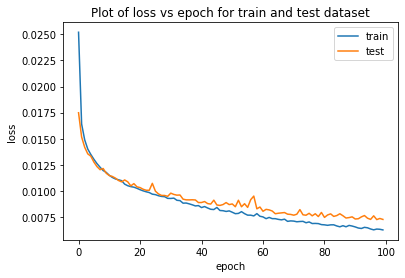

In [27]:
# Plot of loss vs epoch for train and test dataset
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

## 

In [28]:
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test  = X_test .reshape(X_test .shape[0], 1, X_test .shape[1])

X_val = X_val.reshape(X_val.shape[0],1,X_val.shape[1])

# 2- LSTM

### - LSTM Optuna

In [29]:
def objective(trial):
   
    model = Sequential()

    lstm_units1 = trial.suggest_categorical("lstm_units1", [ 50, 75 , 100 ])
    lstm_units2 = trial.suggest_categorical("lstm_units2", [ 25, 50 , 75 ])
    batch_size = trial.suggest_categorical("batch_size",[128, 256, 512])
    activation = trial.suggest_categorical("activation", ['relu','selu','sigmoid','linear','tanh','swish'])
    epochs = trial.suggest_categorical("epochs", [50, 100, 150])
    loss = trial.suggest_categorical("loss",['mse','mae'])
 
    model = Sequential()
    model.add(LSTM(lstm_units1, activation= activation, input_shape=(X_train.shape[1], X_train.shape[2]),return_sequences=True))
    model.add(LSTM(lstm_units2, activation= activation))
    model.add(Flatten())
    model.add(Dense(2))

    model.compile(loss= loss, optimizer='adam')
        
    model.fit(
        X_train,
        y_train,
        validation_data= (X_val,y_val), 
        shuffle= True,
        batch_size= batch_size,
        epochs= epochs,
        verbose= False)
    y_pred = model.predict(X_test)
    loss = mean_squared_error(y_test, y_pred)
    return loss



study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials= 50)

[I 2022-11-05 21:45:14,272] A new study created in memory with name: no-name-a7c9ca64-422d-4053-ae5f-0a2ef38bae15


137/137 [==============================] - 1s 2ms/step


[I 2022-11-05 21:47:12,632] Trial 0 finished with value: 0.00827292313219325 and parameters: {'lstm_units1': 100, 'lstm_units2': 25, 'batch_size': 128, 'activation': 'tanh', 'epochs': 100, 'loss': 'mse'}. Best is trial 0 with value: 0.00827292313219325.


137/137 [==============================] - 1s 2ms/step


[I 2022-11-05 21:47:50,032] Trial 1 finished with value: 0.011781064206189708 and parameters: {'lstm_units1': 100, 'lstm_units2': 50, 'batch_size': 512, 'activation': 'tanh', 'epochs': 50, 'loss': 'mae'}. Best is trial 0 with value: 0.00827292313219325.


137/137 [==============================] - 1s 2ms/step


[I 2022-11-05 21:49:02,587] Trial 2 finished with value: 0.007119294163250036 and parameters: {'lstm_units1': 75, 'lstm_units2': 75, 'batch_size': 256, 'activation': 'selu', 'epochs': 100, 'loss': 'mse'}. Best is trial 2 with value: 0.007119294163250036.


137/137 [==============================] - 1s 1ms/step


[I 2022-11-05 21:50:33,340] Trial 3 finished with value: 0.008327939478680388 and parameters: {'lstm_units1': 75, 'lstm_units2': 25, 'batch_size': 128, 'activation': 'selu', 'epochs': 100, 'loss': 'mae'}. Best is trial 2 with value: 0.007119294163250036.


137/137 [==============================] - 1s 2ms/step


[I 2022-11-05 21:52:19,027] Trial 4 finished with value: 0.009346375332742459 and parameters: {'lstm_units1': 75, 'lstm_units2': 25, 'batch_size': 256, 'activation': 'linear', 'epochs': 100, 'loss': 'mse'}. Best is trial 2 with value: 0.007119294163250036.


137/137 [==============================] - 1s 1ms/step


[I 2022-11-05 21:53:11,632] Trial 5 finished with value: 0.012381842206522378 and parameters: {'lstm_units1': 50, 'lstm_units2': 25, 'batch_size': 128, 'activation': 'swish', 'epochs': 50, 'loss': 'mae'}. Best is trial 2 with value: 0.007119294163250036.


137/137 [==============================] - 1s 1ms/step


[I 2022-11-05 21:54:09,769] Trial 6 finished with value: 0.00936900901781994 and parameters: {'lstm_units1': 75, 'lstm_units2': 25, 'batch_size': 128, 'activation': 'relu', 'epochs': 50, 'loss': 'mse'}. Best is trial 2 with value: 0.007119294163250036.


137/137 [==============================] - 1s 1ms/step


[I 2022-11-05 21:56:07,875] Trial 7 finished with value: 0.009999598385903263 and parameters: {'lstm_units1': 50, 'lstm_units2': 25, 'batch_size': 256, 'activation': 'swish', 'epochs': 150, 'loss': 'mse'}. Best is trial 2 with value: 0.007119294163250036.


137/137 [==============================] - 1s 2ms/step


[I 2022-11-05 22:01:15,769] Trial 8 finished with value: 0.007464680363822802 and parameters: {'lstm_units1': 75, 'lstm_units2': 75, 'batch_size': 128, 'activation': 'tanh', 'epochs': 150, 'loss': 'mse'}. Best is trial 2 with value: 0.007119294163250036.


137/137 [==============================] - 1s 1ms/step


[I 2022-11-05 22:02:20,098] Trial 9 finished with value: 0.00940650009429543 and parameters: {'lstm_units1': 50, 'lstm_units2': 75, 'batch_size': 128, 'activation': 'selu', 'epochs': 50, 'loss': 'mae'}. Best is trial 2 with value: 0.007119294163250036.


137/137 [==============================] - 1s 2ms/step


[I 2022-11-05 22:05:15,449] Trial 10 finished with value: 0.011970205849771388 and parameters: {'lstm_units1': 75, 'lstm_units2': 75, 'batch_size': 256, 'activation': 'sigmoid', 'epochs': 100, 'loss': 'mse'}. Best is trial 2 with value: 0.007119294163250036.


137/137 [==============================] - 1s 2ms/step


[I 2022-11-05 22:07:38,494] Trial 11 finished with value: 0.007641923220540119 and parameters: {'lstm_units1': 75, 'lstm_units2': 75, 'batch_size': 512, 'activation': 'selu', 'epochs': 150, 'loss': 'mse'}. Best is trial 2 with value: 0.007119294163250036.


137/137 [==============================] - 1s 2ms/step


[I 2022-11-05 22:10:29,305] Trial 12 finished with value: 0.008982471279844915 and parameters: {'lstm_units1': 75, 'lstm_units2': 75, 'batch_size': 256, 'activation': 'tanh', 'epochs': 150, 'loss': 'mse'}. Best is trial 2 with value: 0.007119294163250036.


137/137 [==============================] - 1s 2ms/step


[I 2022-11-05 22:14:51,827] Trial 13 finished with value: 0.006885993169682393 and parameters: {'lstm_units1': 75, 'lstm_units2': 75, 'batch_size': 256, 'activation': 'relu', 'epochs': 150, 'loss': 'mse'}. Best is trial 13 with value: 0.006885993169682393.


137/137 [==============================] - 1s 2ms/step


[I 2022-11-05 22:18:07,820] Trial 14 finished with value: 0.008427232728443132 and parameters: {'lstm_units1': 75, 'lstm_units2': 50, 'batch_size': 256, 'activation': 'relu', 'epochs': 150, 'loss': 'mse'}. Best is trial 13 with value: 0.006885993169682393.


137/137 [==============================] - 1s 2ms/step


[I 2022-11-05 22:20:40,372] Trial 15 finished with value: 0.007475228339618488 and parameters: {'lstm_units1': 100, 'lstm_units2': 75, 'batch_size': 256, 'activation': 'relu', 'epochs': 100, 'loss': 'mse'}. Best is trial 13 with value: 0.006885993169682393.


137/137 [==============================] - 1s 2ms/step


[I 2022-11-05 22:23:10,691] Trial 16 finished with value: 0.011934986280835955 and parameters: {'lstm_units1': 75, 'lstm_units2': 75, 'batch_size': 256, 'activation': 'sigmoid', 'epochs': 100, 'loss': 'mse'}. Best is trial 13 with value: 0.006885993169682393.


137/137 [==============================] - 1s 2ms/step


[I 2022-11-05 22:27:50,062] Trial 17 finished with value: 0.008558874872554672 and parameters: {'lstm_units1': 75, 'lstm_units2': 75, 'batch_size': 256, 'activation': 'linear', 'epochs': 150, 'loss': 'mse'}. Best is trial 13 with value: 0.006885993169682393.


137/137 [==============================] - 1s 2ms/step


[I 2022-11-05 22:29:47,222] Trial 18 finished with value: 0.009594259155021321 and parameters: {'lstm_units1': 100, 'lstm_units2': 50, 'batch_size': 512, 'activation': 'selu', 'epochs': 100, 'loss': 'mae'}. Best is trial 13 with value: 0.006885993169682393.


137/137 [==============================] - 1s 1ms/step


[I 2022-11-05 22:32:51,996] Trial 19 finished with value: 0.0077111248227654215 and parameters: {'lstm_units1': 50, 'lstm_units2': 75, 'batch_size': 256, 'activation': 'relu', 'epochs': 150, 'loss': 'mse'}. Best is trial 13 with value: 0.006885993169682393.


137/137 [==============================] - 1s 2ms/step


[I 2022-11-05 22:36:30,864] Trial 20 finished with value: 0.006702600120632319 and parameters: {'lstm_units1': 75, 'lstm_units2': 75, 'batch_size': 256, 'activation': 'relu', 'epochs': 150, 'loss': 'mse'}. Best is trial 20 with value: 0.006702600120632319.


137/137 [==============================] - 1s 2ms/step


[I 2022-11-05 22:40:40,402] Trial 21 finished with value: 0.007275715807453745 and parameters: {'lstm_units1': 75, 'lstm_units2': 75, 'batch_size': 256, 'activation': 'relu', 'epochs': 150, 'loss': 'mse'}. Best is trial 20 with value: 0.006702600120632319.


137/137 [==============================] - 1s 2ms/step


[I 2022-11-05 22:44:21,685] Trial 22 finished with value: 0.0071336834316816445 and parameters: {'lstm_units1': 75, 'lstm_units2': 75, 'batch_size': 256, 'activation': 'relu', 'epochs': 150, 'loss': 'mse'}. Best is trial 20 with value: 0.006702600120632319.


137/137 [==============================] - 1s 2ms/step


[I 2022-11-05 22:47:27,015] Trial 23 finished with value: 0.007013874059917482 and parameters: {'lstm_units1': 75, 'lstm_units2': 75, 'batch_size': 256, 'activation': 'relu', 'epochs': 150, 'loss': 'mse'}. Best is trial 20 with value: 0.006702600120632319.


137/137 [==============================] - 1s 2ms/step


[I 2022-11-05 22:50:18,512] Trial 24 finished with value: 0.007385254560024659 and parameters: {'lstm_units1': 75, 'lstm_units2': 75, 'batch_size': 256, 'activation': 'relu', 'epochs': 150, 'loss': 'mse'}. Best is trial 20 with value: 0.006702600120632319.


137/137 [==============================] - 1s 2ms/step


[I 2022-11-05 22:53:28,702] Trial 25 finished with value: 0.008298290604623886 and parameters: {'lstm_units1': 75, 'lstm_units2': 50, 'batch_size': 512, 'activation': 'relu', 'epochs': 150, 'loss': 'mse'}. Best is trial 20 with value: 0.006702600120632319.


137/137 [==============================] - 1s 2ms/step


[I 2022-11-05 22:56:53,119] Trial 26 finished with value: 0.007994884876767024 and parameters: {'lstm_units1': 75, 'lstm_units2': 75, 'batch_size': 256, 'activation': 'relu', 'epochs': 150, 'loss': 'mae'}. Best is trial 20 with value: 0.006702600120632319.


137/137 [==============================] - 1s 1ms/step


[I 2022-11-05 22:59:17,540] Trial 27 finished with value: 0.007698261957715724 and parameters: {'lstm_units1': 50, 'lstm_units2': 75, 'batch_size': 256, 'activation': 'relu', 'epochs': 150, 'loss': 'mse'}. Best is trial 20 with value: 0.006702600120632319.


137/137 [==============================] - 1s 2ms/step


[I 2022-11-05 23:05:13,795] Trial 28 finished with value: 0.007313407321506512 and parameters: {'lstm_units1': 75, 'lstm_units2': 75, 'batch_size': 256, 'activation': 'relu', 'epochs': 150, 'loss': 'mse'}. Best is trial 20 with value: 0.006702600120632319.


137/137 [==============================] - 1s 2ms/step


[I 2022-11-05 23:08:00,182] Trial 29 finished with value: 0.01200647568848831 and parameters: {'lstm_units1': 100, 'lstm_units2': 50, 'batch_size': 512, 'activation': 'sigmoid', 'epochs': 150, 'loss': 'mse'}. Best is trial 20 with value: 0.006702600120632319.


137/137 [==============================] - 1s 2ms/step


[I 2022-11-05 23:12:10,241] Trial 30 finished with value: 0.008598684224224032 and parameters: {'lstm_units1': 100, 'lstm_units2': 75, 'batch_size': 256, 'activation': 'swish', 'epochs': 150, 'loss': 'mse'}. Best is trial 20 with value: 0.006702600120632319.


137/137 [==============================] - 1s 2ms/step


[I 2022-11-05 23:14:32,603] Trial 31 finished with value: 0.00699175192519233 and parameters: {'lstm_units1': 75, 'lstm_units2': 75, 'batch_size': 256, 'activation': 'selu', 'epochs': 100, 'loss': 'mse'}. Best is trial 20 with value: 0.006702600120632319.


137/137 [==============================] - 1s 2ms/step


[I 2022-11-05 23:16:36,351] Trial 32 finished with value: 0.009340642413594552 and parameters: {'lstm_units1': 75, 'lstm_units2': 75, 'batch_size': 256, 'activation': 'linear', 'epochs': 100, 'loss': 'mse'}. Best is trial 20 with value: 0.006702600120632319.


137/137 [==============================] - 1s 2ms/step


[I 2022-11-05 23:18:15,427] Trial 33 finished with value: 0.009393231905264969 and parameters: {'lstm_units1': 75, 'lstm_units2': 75, 'batch_size': 256, 'activation': 'selu', 'epochs': 50, 'loss': 'mse'}. Best is trial 20 with value: 0.006702600120632319.


137/137 [==============================] - 1s 2ms/step


[I 2022-11-05 23:21:15,042] Trial 34 finished with value: 0.009707051181745138 and parameters: {'lstm_units1': 75, 'lstm_units2': 75, 'batch_size': 256, 'activation': 'relu', 'epochs': 100, 'loss': 'mae'}. Best is trial 20 with value: 0.006702600120632319.


137/137 [==============================] - 1s 2ms/step


[I 2022-11-05 23:23:50,535] Trial 35 finished with value: 0.007242258884375985 and parameters: {'lstm_units1': 75, 'lstm_units2': 75, 'batch_size': 256, 'activation': 'selu', 'epochs': 100, 'loss': 'mse'}. Best is trial 20 with value: 0.006702600120632319.


137/137 [==============================] - 1s 2ms/step


[I 2022-11-05 23:25:09,537] Trial 36 finished with value: 0.010891747681081972 and parameters: {'lstm_units1': 75, 'lstm_units2': 25, 'batch_size': 256, 'activation': 'tanh', 'epochs': 50, 'loss': 'mse'}. Best is trial 20 with value: 0.006702600120632319.


137/137 [==============================] - 1s 2ms/step


[I 2022-11-05 23:32:05,148] Trial 37 finished with value: 0.00770518200686291 and parameters: {'lstm_units1': 75, 'lstm_units2': 75, 'batch_size': 128, 'activation': 'relu', 'epochs': 150, 'loss': 'mae'}. Best is trial 20 with value: 0.006702600120632319.


137/137 [==============================] - 1s 2ms/step


[I 2022-11-05 23:33:46,712] Trial 38 finished with value: 0.01015150739935273 and parameters: {'lstm_units1': 100, 'lstm_units2': 50, 'batch_size': 512, 'activation': 'linear', 'epochs': 100, 'loss': 'mse'}. Best is trial 20 with value: 0.006702600120632319.


137/137 [==============================] - 1s 2ms/step


[I 2022-11-05 23:36:25,515] Trial 39 finished with value: 0.00915025062711525 and parameters: {'lstm_units1': 75, 'lstm_units2': 25, 'batch_size': 256, 'activation': 'swish', 'epochs': 150, 'loss': 'mse'}. Best is trial 20 with value: 0.006702600120632319.


137/137 [==============================] - 1s 2ms/step


[I 2022-11-05 23:38:13,940] Trial 40 finished with value: 0.008830414598651248 and parameters: {'lstm_units1': 50, 'lstm_units2': 75, 'batch_size': 128, 'activation': 'selu', 'epochs': 50, 'loss': 'mse'}. Best is trial 20 with value: 0.006702600120632319.


137/137 [==============================] - 1s 2ms/step


[I 2022-11-05 23:40:47,842] Trial 41 finished with value: 0.0069802552013629475 and parameters: {'lstm_units1': 75, 'lstm_units2': 75, 'batch_size': 256, 'activation': 'selu', 'epochs': 100, 'loss': 'mse'}. Best is trial 20 with value: 0.006702600120632319.


137/137 [==============================] - 1s 2ms/step


[I 2022-11-05 23:43:00,073] Trial 42 finished with value: 0.007043074678685785 and parameters: {'lstm_units1': 75, 'lstm_units2': 75, 'batch_size': 256, 'activation': 'selu', 'epochs': 100, 'loss': 'mse'}. Best is trial 20 with value: 0.006702600120632319.


137/137 [==============================] - 1s 2ms/step


[I 2022-11-05 23:45:01,959] Trial 43 finished with value: 0.007384007788132948 and parameters: {'lstm_units1': 75, 'lstm_units2': 75, 'batch_size': 256, 'activation': 'selu', 'epochs': 100, 'loss': 'mse'}. Best is trial 20 with value: 0.006702600120632319.


137/137 [==============================] - 1s 3ms/step


[I 2022-11-05 23:47:03,728] Trial 44 finished with value: 0.006659568806072302 and parameters: {'lstm_units1': 75, 'lstm_units2': 75, 'batch_size': 256, 'activation': 'selu', 'epochs': 100, 'loss': 'mse'}. Best is trial 44 with value: 0.006659568806072302.


137/137 [==============================] - 1s 2ms/step


[I 2022-11-05 23:49:23,477] Trial 45 finished with value: 0.00847314920145447 and parameters: {'lstm_units1': 75, 'lstm_units2': 25, 'batch_size': 256, 'activation': 'selu', 'epochs': 100, 'loss': 'mse'}. Best is trial 44 with value: 0.006659568806072302.


137/137 [==============================] - 1s 2ms/step


[I 2022-11-05 23:54:21,564] Trial 46 finished with value: 0.007531602159713506 and parameters: {'lstm_units1': 75, 'lstm_units2': 75, 'batch_size': 128, 'activation': 'selu', 'epochs': 100, 'loss': 'mae'}. Best is trial 44 with value: 0.006659568806072302.


137/137 [==============================] - 1s 2ms/step


[I 2022-11-05 23:56:38,241] Trial 47 finished with value: 0.006769057581912428 and parameters: {'lstm_units1': 75, 'lstm_units2': 75, 'batch_size': 256, 'activation': 'selu', 'epochs': 100, 'loss': 'mse'}. Best is trial 44 with value: 0.006659568806072302.


137/137 [==============================] - 1s 2ms/step


[I 2022-11-05 23:58:18,311] Trial 48 finished with value: 0.008587787716611072 and parameters: {'lstm_units1': 50, 'lstm_units2': 75, 'batch_size': 256, 'activation': 'selu', 'epochs': 100, 'loss': 'mse'}. Best is trial 44 with value: 0.006659568806072302.


137/137 [==============================] - 1s 2ms/step


[I 2022-11-06 00:01:59,551] Trial 49 finished with value: 0.009594202705701183 and parameters: {'lstm_units1': 75, 'lstm_units2': 75, 'batch_size': 256, 'activation': 'tanh', 'epochs': 100, 'loss': 'mse'}. Best is trial 44 with value: 0.006659568806072302.


### - LSTM (Optimal parameters)

In [30]:
print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

Number of finished trials: 50
Best trial:
  Value: 0.006659568806072302
  Params: 
    lstm_units1: 75
    lstm_units2: 75
    batch_size: 256
    activation: selu
    epochs: 100
    loss: mse


### - LSTM Run (Optimal parameters)

In [31]:
model = Sequential()

model.add(LSTM(trial.params["lstm_units1"], activation= trial.params['activation'], 
               input_shape=(X_train.shape[1],X_train.shape[2]),
               return_sequences=True))

model.add(LSTM(trial.params["lstm_units2"], activation= trial.params['activation']))
model.add(Dense(2))

model.compile(loss=trial.params["loss"], optimizer='adam')


model.summary()

print()

history = model.fit(X_train, 
                    y_train, 
                    epochs= trial.params["epochs"], 
                    verbose= 1,
                    batch_size= trial.params["batch_size"], 
                    validation_split=0.3, 
                    validation_data=(X_val,y_val))

Model: "sequential_121"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_100 (LSTM)             (None, 1, 75)             48000     
                                                                 
 lstm_101 (LSTM)             (None, 75)                45300     
                                                                 
 dense_113 (Dense)           (None, 2)                 152       
                                                                 
Total params: 93,452
Trainable params: 93,452
Non-trainable params: 0
_________________________________________________________________

Epoch 1/100
137/137 [==============================] - 5s 17ms/step - loss: 0.0211 - val_loss: 0.0162
Epoch 2/100
137/137 [==============================] - 2s 14ms/step - loss: 0.0156 - val_loss: 0.0144
Epoch 3/100
137/137 [==============================] - 2s 14ms/step - loss: 0.0143 - val_loss: 0.0139
Epoch

In [32]:
train_results = model.evaluate(X_train, y_train)
test_results  = model.evaluate(X_test , y_test)



y_pred_train = model.predict(X_train)
y_pred_test  = model.predict(X_test )

137/137 [==============================] - 0s 2ms/step


In [33]:
print("*" * 40)
print(" Train ".center(40,"-"))
print("*" * 40)

print("Mean absolute error ----------->", round(mean_absolute_error(y_train.flatten(),y_pred_train.flatten()),5))
print("Mean squared error ------------>", round(mean_squared_error(y_train.flatten(),y_pred_train.flatten()),5))
print("Root mean squared error ------->", round(sqrt(mean_squared_error(y_train.flatten(),y_pred_train.flatten())),5))
print("Root mean squared log error --->", round(log(sqrt(mean_squared_error(y_train.flatten(),y_pred_train.flatten()))),5),sep="")
print("R squared  -------------------->", round(r2_score(y_train.flatten(),y_pred_train.flatten()),5))

print("\n","*" * 40,sep="")
print(" Test ".center(40,"-"))
print("*" * 40)

print("Mean absolute error ----------->", round(mean_absolute_error(y_test.flatten(),y_pred_test.flatten()),5))
print("Mean squared error ------------>", round(mean_squared_error(y_test.flatten(),y_pred_test.flatten()),5))
print("Root mean squared error ------->", round(sqrt(mean_squared_error(y_test.flatten(),y_pred_test.flatten())),5))
print("Root mean squared log error --->", round(log(sqrt(mean_squared_error(y_test.flatten(),y_pred_test.flatten()))),5),sep="")
print("R squared  -------------------->", round(r2_score(y_test.flatten(),y_pred_test.flatten()),5))

****************************************
---------------- Train -----------------
****************************************
Mean absolute error -----------> 0.04625
Mean squared error ------------> 0.00558
Root mean squared error -------> 0.07468
Root mean squared log error --->-2.59458
R squared  --------------------> 0.87758

****************************************
----------------- Test -----------------
****************************************
Mean absolute error -----------> 0.0509
Mean squared error ------------> 0.00666
Root mean squared error -------> 0.08158
Root mean squared log error --->-2.50614
R squared  --------------------> 0.84929


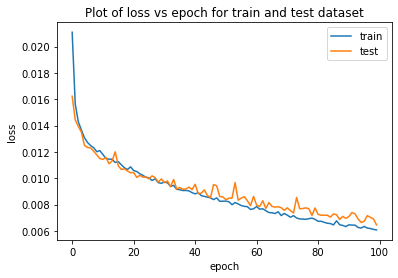

In [34]:
# Plot of loss vs epoch for train and test dataset
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# 3- CNN

### - CNN Optuna

In [35]:
def objective(trial):
    
    model = Sequential()
    
    conv1D_units1 = trial.suggest_categorical("conv1D_units1", [ 32, 64 , 128 ])
    conv1D_units2 = trial.suggest_categorical("conv1D_units2", [ 16, 32 , 64 ])
    dence_units   = trial.suggest_categorical("dence_units", [ 20, 30 , 50 ])
    
    kernal_size1 = trial.suggest_categorical("kernal_size1", [  3 , 4 , 5 , 6 ])
    kernal_size2 = trial.suggest_categorical("kernal_size2", [  3 , 4 , 5 , 6 ])
    
    dropout1   = trial.suggest_categorical("dropout1", [ 0.2, 0.4 , 0.6 , 0.8])
    dropout2   = trial.suggest_categorical("dropout2", [ 0.2, 0.4 , 0.6 , 0.8])
    
    batch_size = trial.suggest_categorical("batch_size",[128, 256, 512 , 1024])
    activation = trial.suggest_categorical("activation", ['relu','selu','sigmoid','linear','tanh','swish'])
    epochs     = trial.suggest_categorical("epochs", [50, 75, 100 , 150])
    loss       = trial.suggest_categorical("loss",['mse','mae'])
    
    
    model.add(Conv1D(conv1D_units1, kernal_size1, padding="same",input_shape = (X_train.shape[1],X_train.shape[2]), activation= activation))
    model.add(MaxPool1D(pool_size= 1))
    model.add(Dropout(dropout1))
    model.add(Conv1D(conv1D_units2, kernal_size2, padding="same", activation= activation))
    model.add(MaxPool1D(pool_size= 1))
    model.add(Dropout(dropout2))
    model.add(Flatten())
    model.add(Dense(units= dence_units))
    model.add(Dense(units= 2))
    
    
    
    model.compile(loss= loss, optimizer='adam')
    my_callbacks = [keras.callbacks.ModelCheckpoint(filepath='model_Cnn2.h5' , monitor = 'val_loss' , save_best_only=True)]

    
    model.fit(
        X_train,
        y_train,
        validation_data= (X_val,y_val), 
        shuffle= False,
        batch_size= batch_size,
        epochs= epochs,
        verbose= 0)
    y_pred = model.predict(X_test)
    loss = mean_squared_error(y_test, y_pred)
    return loss



study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials= 30) 

[I 2022-11-06 00:05:30,569] A new study created in memory with name: no-name-7542d48e-1538-4d09-a02b-8382435db67e


137/137 [==============================] - 0s 1ms/step


[I 2022-11-06 00:08:08,005] Trial 0 finished with value: 0.013325967794863206 and parameters: {'conv1D_units1': 32, 'conv1D_units2': 64, 'dence_units': 20, 'kernal_size1': 5, 'kernal_size2': 5, 'dropout1': 0.2, 'dropout2': 0.4, 'batch_size': 128, 'activation': 'sigmoid', 'epochs': 150, 'loss': 'mae'}. Best is trial 0 with value: 0.013325967794863206.


137/137 [==============================] - 0s 2ms/step


[I 2022-11-06 00:08:56,033] Trial 1 finished with value: 0.036989648382450446 and parameters: {'conv1D_units1': 32, 'conv1D_units2': 64, 'dence_units': 30, 'kernal_size1': 4, 'kernal_size2': 5, 'dropout1': 0.8, 'dropout2': 0.2, 'batch_size': 256, 'activation': 'swish', 'epochs': 75, 'loss': 'mse'}. Best is trial 0 with value: 0.013325967794863206.


137/137 [==============================] - 0s 2ms/step


[I 2022-11-06 00:09:27,510] Trial 2 finished with value: 0.015816193517747393 and parameters: {'conv1D_units1': 128, 'conv1D_units2': 16, 'dence_units': 20, 'kernal_size1': 6, 'kernal_size2': 5, 'dropout1': 0.4, 'dropout2': 0.2, 'batch_size': 1024, 'activation': 'tanh', 'epochs': 50, 'loss': 'mae'}. Best is trial 0 with value: 0.013325967794863206.


137/137 [==============================] - 0s 2ms/step


[I 2022-11-06 00:10:27,619] Trial 3 finished with value: 0.016338278029358173 and parameters: {'conv1D_units1': 128, 'conv1D_units2': 64, 'dence_units': 20, 'kernal_size1': 5, 'kernal_size2': 3, 'dropout1': 0.8, 'dropout2': 0.2, 'batch_size': 1024, 'activation': 'linear', 'epochs': 100, 'loss': 'mae'}. Best is trial 0 with value: 0.013325967794863206.


137/137 [==============================] - 0s 1ms/step


[I 2022-11-06 00:11:06,974] Trial 4 finished with value: 0.021807211275563936 and parameters: {'conv1D_units1': 32, 'conv1D_units2': 16, 'dence_units': 30, 'kernal_size1': 5, 'kernal_size2': 6, 'dropout1': 0.4, 'dropout2': 0.8, 'batch_size': 512, 'activation': 'selu', 'epochs': 75, 'loss': 'mae'}. Best is trial 0 with value: 0.013325967794863206.


137/137 [==============================] - 0s 2ms/step


[I 2022-11-06 00:12:01,666] Trial 5 finished with value: 0.015535925015407808 and parameters: {'conv1D_units1': 128, 'conv1D_units2': 64, 'dence_units': 20, 'kernal_size1': 6, 'kernal_size2': 5, 'dropout1': 0.2, 'dropout2': 0.8, 'batch_size': 1024, 'activation': 'swish', 'epochs': 75, 'loss': 'mae'}. Best is trial 0 with value: 0.013325967794863206.


137/137 [==============================] - 0s 2ms/step


[I 2022-11-06 00:13:10,931] Trial 6 finished with value: 0.014881119502119079 and parameters: {'conv1D_units1': 64, 'conv1D_units2': 16, 'dence_units': 30, 'kernal_size1': 3, 'kernal_size2': 6, 'dropout1': 0.8, 'dropout2': 0.4, 'batch_size': 1024, 'activation': 'selu', 'epochs': 150, 'loss': 'mse'}. Best is trial 0 with value: 0.013325967794863206.


137/137 [==============================] - 0s 1ms/step


[I 2022-11-06 00:13:49,803] Trial 7 finished with value: 0.012017085767716675 and parameters: {'conv1D_units1': 32, 'conv1D_units2': 16, 'dence_units': 20, 'kernal_size1': 4, 'kernal_size2': 5, 'dropout1': 0.2, 'dropout2': 0.4, 'batch_size': 256, 'activation': 'relu', 'epochs': 75, 'loss': 'mse'}. Best is trial 7 with value: 0.012017085767716675.


137/137 [==============================] - 0s 1ms/step


[I 2022-11-06 00:14:18,140] Trial 8 finished with value: 0.014729103205858227 and parameters: {'conv1D_units1': 128, 'conv1D_units2': 32, 'dence_units': 20, 'kernal_size1': 3, 'kernal_size2': 5, 'dropout1': 0.4, 'dropout2': 0.6, 'batch_size': 512, 'activation': 'tanh', 'epochs': 50, 'loss': 'mse'}. Best is trial 7 with value: 0.012017085767716675.


137/137 [==============================] - 0s 1ms/step


[I 2022-11-06 00:15:01,277] Trial 9 finished with value: 0.02178942983048473 and parameters: {'conv1D_units1': 32, 'conv1D_units2': 64, 'dence_units': 50, 'kernal_size1': 4, 'kernal_size2': 4, 'dropout1': 0.8, 'dropout2': 0.2, 'batch_size': 512, 'activation': 'sigmoid', 'epochs': 75, 'loss': 'mae'}. Best is trial 7 with value: 0.012017085767716675.


137/137 [==============================] - 0s 2ms/step


[I 2022-11-06 00:16:05,960] Trial 10 finished with value: 0.015841345476580514 and parameters: {'conv1D_units1': 64, 'conv1D_units2': 32, 'dence_units': 50, 'kernal_size1': 4, 'kernal_size2': 4, 'dropout1': 0.6, 'dropout2': 0.4, 'batch_size': 256, 'activation': 'relu', 'epochs': 100, 'loss': 'mse'}. Best is trial 7 with value: 0.012017085767716675.


137/137 [==============================] - 0s 1ms/step


[I 2022-11-06 00:18:10,376] Trial 11 finished with value: 0.013333070289492058 and parameters: {'conv1D_units1': 32, 'conv1D_units2': 16, 'dence_units': 20, 'kernal_size1': 5, 'kernal_size2': 5, 'dropout1': 0.2, 'dropout2': 0.4, 'batch_size': 128, 'activation': 'sigmoid', 'epochs': 150, 'loss': 'mse'}. Best is trial 7 with value: 0.012017085767716675.


137/137 [==============================] - 0s 1ms/step


[I 2022-11-06 00:20:16,123] Trial 12 finished with value: 0.013851775818597143 and parameters: {'conv1D_units1': 32, 'conv1D_units2': 64, 'dence_units': 20, 'kernal_size1': 4, 'kernal_size2': 3, 'dropout1': 0.2, 'dropout2': 0.4, 'batch_size': 128, 'activation': 'relu', 'epochs': 150, 'loss': 'mae'}. Best is trial 7 with value: 0.012017085767716675.


137/137 [==============================] - 0s 2ms/step


[I 2022-11-06 00:21:46,275] Trial 13 finished with value: 0.010908740212479987 and parameters: {'conv1D_units1': 32, 'conv1D_units2': 16, 'dence_units': 20, 'kernal_size1': 5, 'kernal_size2': 5, 'dropout1': 0.2, 'dropout2': 0.4, 'batch_size': 256, 'activation': 'relu', 'epochs': 150, 'loss': 'mse'}. Best is trial 13 with value: 0.010908740212479987.


137/137 [==============================] - 0s 2ms/step


[I 2022-11-06 00:22:29,968] Trial 14 finished with value: 0.013109723932524627 and parameters: {'conv1D_units1': 32, 'conv1D_units2': 16, 'dence_units': 50, 'kernal_size1': 4, 'kernal_size2': 5, 'dropout1': 0.2, 'dropout2': 0.6, 'batch_size': 256, 'activation': 'relu', 'epochs': 75, 'loss': 'mse'}. Best is trial 13 with value: 0.010908740212479987.


137/137 [==============================] - 0s 1ms/step


[I 2022-11-06 00:24:00,095] Trial 15 finished with value: 0.01985840999124905 and parameters: {'conv1D_units1': 32, 'conv1D_units2': 16, 'dence_units': 20, 'kernal_size1': 5, 'kernal_size2': 5, 'dropout1': 0.6, 'dropout2': 0.4, 'batch_size': 256, 'activation': 'relu', 'epochs': 150, 'loss': 'mse'}. Best is trial 13 with value: 0.010908740212479987.


137/137 [==============================] - 0s 1ms/step


[I 2022-11-06 00:24:55,060] Trial 16 finished with value: 0.010670972843338653 and parameters: {'conv1D_units1': 64, 'conv1D_units2': 16, 'dence_units': 20, 'kernal_size1': 3, 'kernal_size2': 3, 'dropout1': 0.2, 'dropout2': 0.4, 'batch_size': 256, 'activation': 'relu', 'epochs': 100, 'loss': 'mse'}. Best is trial 16 with value: 0.010670972843338653.


137/137 [==============================] - 0s 1ms/step


[I 2022-11-06 00:25:52,100] Trial 17 finished with value: 0.014925363279566556 and parameters: {'conv1D_units1': 64, 'conv1D_units2': 16, 'dence_units': 20, 'kernal_size1': 3, 'kernal_size2': 3, 'dropout1': 0.2, 'dropout2': 0.4, 'batch_size': 256, 'activation': 'linear', 'epochs': 100, 'loss': 'mse'}. Best is trial 16 with value: 0.010670972843338653.


137/137 [==============================] - 0s 2ms/step


[I 2022-11-06 00:26:52,951] Trial 18 finished with value: 0.014216107827352494 and parameters: {'conv1D_units1': 64, 'conv1D_units2': 32, 'dence_units': 30, 'kernal_size1': 3, 'kernal_size2': 3, 'dropout1': 0.2, 'dropout2': 0.8, 'batch_size': 256, 'activation': 'relu', 'epochs': 100, 'loss': 'mse'}. Best is trial 16 with value: 0.010670972843338653.


137/137 [==============================] - 0s 1ms/step


[I 2022-11-06 00:27:53,288] Trial 19 finished with value: 0.01465226709983972 and parameters: {'conv1D_units1': 64, 'conv1D_units2': 16, 'dence_units': 50, 'kernal_size1': 3, 'kernal_size2': 3, 'dropout1': 0.6, 'dropout2': 0.6, 'batch_size': 256, 'activation': 'relu', 'epochs': 100, 'loss': 'mse'}. Best is trial 16 with value: 0.010670972843338653.


137/137 [==============================] - 0s 2ms/step


[I 2022-11-06 00:28:26,193] Trial 20 finished with value: 0.011878991261622463 and parameters: {'conv1D_units1': 64, 'conv1D_units2': 16, 'dence_units': 20, 'kernal_size1': 6, 'kernal_size2': 4, 'dropout1': 0.2, 'dropout2': 0.4, 'batch_size': 256, 'activation': 'relu', 'epochs': 50, 'loss': 'mse'}. Best is trial 16 with value: 0.010670972843338653.


137/137 [==============================] - 0s 2ms/step


[I 2022-11-06 00:28:59,026] Trial 21 finished with value: 0.012196486118424957 and parameters: {'conv1D_units1': 64, 'conv1D_units2': 16, 'dence_units': 20, 'kernal_size1': 6, 'kernal_size2': 4, 'dropout1': 0.2, 'dropout2': 0.4, 'batch_size': 256, 'activation': 'relu', 'epochs': 50, 'loss': 'mse'}. Best is trial 16 with value: 0.010670972843338653.


137/137 [==============================] - 0s 2ms/step


[I 2022-11-06 00:29:31,352] Trial 22 finished with value: 0.011468314514096196 and parameters: {'conv1D_units1': 64, 'conv1D_units2': 16, 'dence_units': 20, 'kernal_size1': 6, 'kernal_size2': 4, 'dropout1': 0.2, 'dropout2': 0.4, 'batch_size': 256, 'activation': 'relu', 'epochs': 50, 'loss': 'mse'}. Best is trial 16 with value: 0.010670972843338653.


137/137 [==============================] - 0s 1ms/step


[I 2022-11-06 00:30:03,918] Trial 23 finished with value: 0.011464746542505701 and parameters: {'conv1D_units1': 64, 'conv1D_units2': 16, 'dence_units': 20, 'kernal_size1': 6, 'kernal_size2': 4, 'dropout1': 0.2, 'dropout2': 0.4, 'batch_size': 256, 'activation': 'relu', 'epochs': 50, 'loss': 'mse'}. Best is trial 16 with value: 0.010670972843338653.


137/137 [==============================] - 0s 2ms/step


[I 2022-11-06 00:31:43,370] Trial 24 finished with value: 0.010338149467650062 and parameters: {'conv1D_units1': 64, 'conv1D_units2': 16, 'dence_units': 20, 'kernal_size1': 6, 'kernal_size2': 6, 'dropout1': 0.2, 'dropout2': 0.4, 'batch_size': 256, 'activation': 'relu', 'epochs': 150, 'loss': 'mse'}. Best is trial 24 with value: 0.010338149467650062.


137/137 [==============================] - 0s 1ms/step


[I 2022-11-06 00:33:10,248] Trial 25 finished with value: 0.012944762081564441 and parameters: {'conv1D_units1': 64, 'conv1D_units2': 32, 'dence_units': 20, 'kernal_size1': 3, 'kernal_size2': 6, 'dropout1': 0.2, 'dropout2': 0.4, 'batch_size': 256, 'activation': 'tanh', 'epochs': 150, 'loss': 'mse'}. Best is trial 24 with value: 0.010338149467650062.


137/137 [==============================] - 0s 2ms/step


[I 2022-11-06 00:34:43,325] Trial 26 finished with value: 0.012879438538971468 and parameters: {'conv1D_units1': 64, 'conv1D_units2': 16, 'dence_units': 20, 'kernal_size1': 5, 'kernal_size2': 6, 'dropout1': 0.2, 'dropout2': 0.4, 'batch_size': 256, 'activation': 'selu', 'epochs': 150, 'loss': 'mse'}. Best is trial 24 with value: 0.010338149467650062.


137/137 [==============================] - 0s 2ms/step


[I 2022-11-06 00:37:50,031] Trial 27 finished with value: 0.015363795281458339 and parameters: {'conv1D_units1': 64, 'conv1D_units2': 16, 'dence_units': 50, 'kernal_size1': 5, 'kernal_size2': 6, 'dropout1': 0.6, 'dropout2': 0.6, 'batch_size': 128, 'activation': 'linear', 'epochs': 150, 'loss': 'mse'}. Best is trial 24 with value: 0.010338149467650062.


137/137 [==============================] - 0s 2ms/step


[I 2022-11-06 00:38:45,270] Trial 28 finished with value: 0.016916434648889516 and parameters: {'conv1D_units1': 64, 'conv1D_units2': 16, 'dence_units': 30, 'kernal_size1': 3, 'kernal_size2': 3, 'dropout1': 0.4, 'dropout2': 0.8, 'batch_size': 512, 'activation': 'swish', 'epochs': 100, 'loss': 'mse'}. Best is trial 24 with value: 0.010338149467650062.


137/137 [==============================] - 0s 3ms/step


[I 2022-11-06 00:42:35,855] Trial 29 finished with value: 0.011902536875524828 and parameters: {'conv1D_units1': 128, 'conv1D_units2': 32, 'dence_units': 20, 'kernal_size1': 6, 'kernal_size2': 6, 'dropout1': 0.2, 'dropout2': 0.4, 'batch_size': 128, 'activation': 'sigmoid', 'epochs': 150, 'loss': 'mse'}. Best is trial 24 with value: 0.010338149467650062.


### - CNN (Optimal parameters)

In [36]:
print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

Number of finished trials: 30
Best trial:
  Value: 0.010338149467650062
  Params: 
    conv1D_units1: 64
    conv1D_units2: 16
    dence_units: 20
    kernal_size1: 6
    kernal_size2: 6
    dropout1: 0.2
    dropout2: 0.4
    batch_size: 256
    activation: relu
    epochs: 150
    loss: mse


### - CNN Run (Optimal parameters)

In [37]:
model = Sequential()

model.add(Conv1D(trial.params["conv1D_units1"], trial.params["kernal_size1"], padding="same",input_shape = (X_train.shape[1], X_train.shape[2]), activation=trial.params["activation"]))
model.add(MaxPool1D(pool_size=(1)))  
model.add(Dropout(trial.params["dropout1"]))
model.add(Conv1D(trial.params["conv1D_units2"], trial.params["kernal_size2"], padding="same", activation=trial.params["activation"]))
model.add(MaxPool1D(pool_size=(1)))  
model.add(Dropout(trial.params["dropout2"]))
model.add(Flatten())
model.add(Dense(units=trial.params["dence_units"]))
model.add(Dense(units=2))


model.compile(loss=trial.params["loss"], optimizer='adam')

model.summary()

print()

history = model.fit(X_train, 
                    y_train, 
                    epochs= trial.params["epochs"], 
                    verbose= 1,
                    batch_size= trial.params["batch_size"], 
                    validation_split=0.3, 
                    validation_data=(X_val,y_val)
                   )

Model: "sequential_152"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_60 (Conv1D)          (None, 1, 64)             32320     
                                                                 
 max_pooling1d_60 (MaxPoolin  (None, 1, 64)            0         
 g1D)                                                            
                                                                 
 dropout_60 (Dropout)        (None, 1, 64)             0         
                                                                 
 conv1d_61 (Conv1D)          (None, 1, 16)             6160      
                                                                 
 max_pooling1d_61 (MaxPoolin  (None, 1, 16)            0         
 g1D)                                                            
                                                                 
 dropout_61 (Dropout)        (None, 1, 16)          

In [38]:
train_results = model.evaluate(X_train, y_train)
test_results  = model.evaluate(X_test, y_test)



y_pred_train = model.predict(X_train)
y_pred_test  = model.predict(X_test)

137/137 [==============================] - 0s 2ms/step


In [39]:
print("*" * 40)
print(" Train ".center(40,"-"))
print("*" * 40)

print("Mean absolute error ----------->", round(mean_absolute_error(y_train.flatten(),y_pred_train.flatten()),5))
print("Mean squared error ------------>", round(mean_squared_error(y_train.flatten(),y_pred_train.flatten()),5))
print("Root mean squared error ------->", round(sqrt(mean_squared_error(y_train.flatten(),y_pred_train.flatten())),5))
print("Root mean squared log error --->", round(log(sqrt(mean_squared_error(y_train.flatten(),y_pred_train.flatten()))),5),sep="")
print("R squared  -------------------->", round(r2_score(y_train.flatten(),y_pred_train.flatten()),5))

print("\n","*" * 40,sep="")
print(" Test ".center(40,"-"))
print("*" * 40)

print("Mean absolute error ----------->", round(mean_absolute_error(y_test.flatten(),y_pred_test.flatten()),5))
print("Mean squared error ------------>", round(mean_squared_error(y_test.flatten(),y_pred_test.flatten()),5))
print("Root mean squared error ------->", round(sqrt(mean_squared_error(y_test.flatten(),y_pred_test.flatten())),5))
print("Root mean squared log error --->", round(log(sqrt(mean_squared_error(y_test.flatten(),y_pred_test.flatten()))),5),sep="")
print("R squared  -------------------->", round(r2_score(y_test.flatten(),y_pred_test.flatten()),5))

****************************************
---------------- Train -----------------
****************************************
Mean absolute error -----------> 0.07072
Mean squared error ------------> 0.01063
Root mean squared error -------> 0.10309
Root mean squared log error --->-2.27219
R squared  --------------------> 0.76672

****************************************
----------------- Test -----------------
****************************************
Mean absolute error -----------> 0.0719
Mean squared error ------------> 0.01091
Root mean squared error -------> 0.10447
Root mean squared log error --->-2.25883
R squared  --------------------> 0.75285


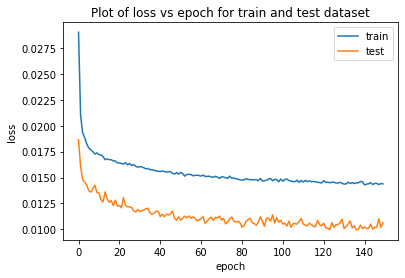

In [40]:
# Plot of loss vs epoch for train and test dataset
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# 4- GRU

### - GRU Optuna

In [41]:
def objective(trial):
   
    model = Sequential()

    gru_units1 = trial.suggest_categorical("gru_units1", [ 75 , 100 , 150 ])
    gru_units2 = trial.suggest_categorical("gru_units2", [ 50 , 75  , 100 ])
    gru_units3 = trial.suggest_categorical("gru_units3", [ 25 , 50  , 75  ])
    dence_units = trial.suggest_categorical("dence_units", [ 10, 20 , 30 ])

    dropout1 = trial.suggest_categorical("dropout1", [ 0.2, 0.4 , 0.6 ])
    dropout2 = trial.suggest_categorical("dropout2", [ 0.2, 0.4 , 0.6 ])
    dropout3 = trial.suggest_categorical("dropout3", [ 0.2, 0.4 , 0.6 ])

    batch_size = trial.suggest_categorical("batch_size",[128, 256, 512, 1024])
    activation = trial.suggest_categorical("activation", ['relu','selu','sigmoid','linear','tanh','swish'])

    epochs = trial.suggest_categorical("epochs", [20, 50, 75 ])
    loss = trial.suggest_categorical("loss",['mse','mae'])
        
    model.add(GRU(gru_units1, activation=activation, input_shape=(X_train.shape[1],X_train.shape[2]), return_sequences=True))
    model.add(Dropout(dropout1))
    model.add(GRU(gru_units2, activation='tanh', return_sequences=True))
    model.add(Dropout(dropout2))
    model.add(GRU(gru_units3))
    model.add(Dropout(dropout3))
    model.add(Dense(dence_units))
    model.add(Dense(2))
    
    model.compile(loss= loss, optimizer='adam')
        
    
    model.fit(
        X_train,
        y_train,
        validation_data= (X_val,y_val), 
        shuffle= True,
        batch_size= batch_size,
        epochs= epochs,
        verbose= 0)
    y_pred = model.predict(X_test)
    loss = mean_squared_error(y_test, y_pred)
    return loss



study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials= 25 ) 

[I 2022-11-06 00:44:42,611] A new study created in memory with name: no-name-0d488bf2-45ab-452e-815b-347c0edb7acd


137/137 [==============================] - 1s 3ms/step


[I 2022-11-06 00:46:24,226] Trial 0 finished with value: 0.012123677655171021 and parameters: {'gru_units1': 150, 'gru_units2': 75, 'gru_units3': 50, 'dence_units': 10, 'dropout1': 0.2, 'dropout2': 0.6, 'dropout3': 0.2, 'batch_size': 1024, 'activation': 'linear', 'epochs': 75, 'loss': 'mae'}. Best is trial 0 with value: 0.012123677655171021.


137/137 [==============================] - 2s 2ms/step


[I 2022-11-06 00:49:06,328] Trial 1 finished with value: 0.009343082042476102 and parameters: {'gru_units1': 150, 'gru_units2': 50, 'gru_units3': 50, 'dence_units': 20, 'dropout1': 0.2, 'dropout2': 0.4, 'dropout3': 0.6, 'batch_size': 256, 'activation': 'relu', 'epochs': 75, 'loss': 'mse'}. Best is trial 1 with value: 0.009343082042476102.


137/137 [==============================] - 1s 2ms/step


[I 2022-11-06 00:50:22,966] Trial 2 finished with value: 0.012594189118413346 and parameters: {'gru_units1': 75, 'gru_units2': 100, 'gru_units3': 50, 'dence_units': 20, 'dropout1': 0.2, 'dropout2': 0.6, 'dropout3': 0.6, 'batch_size': 1024, 'activation': 'swish', 'epochs': 75, 'loss': 'mse'}. Best is trial 1 with value: 0.009343082042476102.


137/137 [==============================] - 2s 3ms/step


[I 2022-11-06 00:53:28,262] Trial 3 finished with value: 0.012847847129966198 and parameters: {'gru_units1': 150, 'gru_units2': 50, 'gru_units3': 75, 'dence_units': 10, 'dropout1': 0.6, 'dropout2': 0.4, 'dropout3': 0.4, 'batch_size': 512, 'activation': 'tanh', 'epochs': 75, 'loss': 'mae'}. Best is trial 1 with value: 0.009343082042476102.


137/137 [==============================] - 1s 2ms/step


[I 2022-11-06 00:55:14,984] Trial 4 finished with value: 0.0133980147239854 and parameters: {'gru_units1': 75, 'gru_units2': 75, 'gru_units3': 50, 'dence_units': 20, 'dropout1': 0.2, 'dropout2': 0.6, 'dropout3': 0.6, 'batch_size': 1024, 'activation': 'tanh', 'epochs': 75, 'loss': 'mae'}. Best is trial 1 with value: 0.009343082042476102.


137/137 [==============================] - 1s 3ms/step


[I 2022-11-06 00:58:16,809] Trial 5 finished with value: 0.013617657105962442 and parameters: {'gru_units1': 150, 'gru_units2': 75, 'gru_units3': 50, 'dence_units': 10, 'dropout1': 0.6, 'dropout2': 0.4, 'dropout3': 0.2, 'batch_size': 512, 'activation': 'sigmoid', 'epochs': 75, 'loss': 'mae'}. Best is trial 1 with value: 0.009343082042476102.


137/137 [==============================] - 1s 3ms/step


[I 2022-11-06 01:00:11,790] Trial 6 finished with value: 0.013399103010499206 and parameters: {'gru_units1': 150, 'gru_units2': 75, 'gru_units3': 75, 'dence_units': 10, 'dropout1': 0.6, 'dropout2': 0.4, 'dropout3': 0.4, 'batch_size': 512, 'activation': 'linear', 'epochs': 50, 'loss': 'mae'}. Best is trial 1 with value: 0.009343082042476102.


137/137 [==============================] - 1s 2ms/step


[I 2022-11-06 01:04:26,279] Trial 7 finished with value: 0.011194031527429836 and parameters: {'gru_units1': 75, 'gru_units2': 100, 'gru_units3': 50, 'dence_units': 30, 'dropout1': 0.2, 'dropout2': 0.6, 'dropout3': 0.4, 'batch_size': 256, 'activation': 'swish', 'epochs': 75, 'loss': 'mse'}. Best is trial 1 with value: 0.009343082042476102.


137/137 [==============================] - 1s 2ms/step


[I 2022-11-06 01:06:38,076] Trial 8 finished with value: 0.012171691616497771 and parameters: {'gru_units1': 75, 'gru_units2': 75, 'gru_units3': 50, 'dence_units': 30, 'dropout1': 0.4, 'dropout2': 0.6, 'dropout3': 0.6, 'batch_size': 256, 'activation': 'swish', 'epochs': 50, 'loss': 'mse'}. Best is trial 1 with value: 0.009343082042476102.


137/137 [==============================] - 1s 2ms/step


[I 2022-11-06 01:07:07,960] Trial 9 finished with value: 0.014612229399850539 and parameters: {'gru_units1': 150, 'gru_units2': 75, 'gru_units3': 25, 'dence_units': 10, 'dropout1': 0.6, 'dropout2': 0.6, 'dropout3': 0.4, 'batch_size': 1024, 'activation': 'linear', 'epochs': 20, 'loss': 'mae'}. Best is trial 1 with value: 0.009343082042476102.


137/137 [==============================] - 1s 2ms/step


[I 2022-11-06 01:07:58,668] Trial 10 finished with value: 0.012104223249770596 and parameters: {'gru_units1': 100, 'gru_units2': 50, 'gru_units3': 25, 'dence_units': 20, 'dropout1': 0.4, 'dropout2': 0.2, 'dropout3': 0.6, 'batch_size': 128, 'activation': 'relu', 'epochs': 20, 'loss': 'mse'}. Best is trial 1 with value: 0.009343082042476102.


137/137 [==============================] - 2s 2ms/step


[I 2022-11-06 01:10:37,824] Trial 11 finished with value: 0.009922887884211305 and parameters: {'gru_units1': 100, 'gru_units2': 100, 'gru_units3': 50, 'dence_units': 30, 'dropout1': 0.2, 'dropout2': 0.2, 'dropout3': 0.4, 'batch_size': 256, 'activation': 'selu', 'epochs': 75, 'loss': 'mse'}. Best is trial 1 with value: 0.009343082042476102.


137/137 [==============================] - 1s 2ms/step


[I 2022-11-06 01:13:46,117] Trial 12 finished with value: 0.010778106506742555 and parameters: {'gru_units1': 100, 'gru_units2': 50, 'gru_units3': 50, 'dence_units': 30, 'dropout1': 0.2, 'dropout2': 0.2, 'dropout3': 0.6, 'batch_size': 256, 'activation': 'selu', 'epochs': 75, 'loss': 'mse'}. Best is trial 1 with value: 0.009343082042476102.


137/137 [==============================] - 2s 2ms/step


[I 2022-11-06 01:17:26,932] Trial 13 finished with value: 0.008819603191128277 and parameters: {'gru_units1': 100, 'gru_units2': 100, 'gru_units3': 50, 'dence_units': 30, 'dropout1': 0.2, 'dropout2': 0.2, 'dropout3': 0.4, 'batch_size': 256, 'activation': 'relu', 'epochs': 75, 'loss': 'mse'}. Best is trial 13 with value: 0.008819603191128277.


137/137 [==============================] - 1s 2ms/step


[I 2022-11-06 01:18:33,460] Trial 14 finished with value: 0.010808919317884223 and parameters: {'gru_units1': 100, 'gru_units2': 100, 'gru_units3': 25, 'dence_units': 20, 'dropout1': 0.2, 'dropout2': 0.2, 'dropout3': 0.2, 'batch_size': 256, 'activation': 'relu', 'epochs': 20, 'loss': 'mse'}. Best is trial 13 with value: 0.008819603191128277.


137/137 [==============================] - 2s 2ms/step


[I 2022-11-06 01:21:11,761] Trial 15 finished with value: 0.009547615325490602 and parameters: {'gru_units1': 100, 'gru_units2': 50, 'gru_units3': 75, 'dence_units': 30, 'dropout1': 0.2, 'dropout2': 0.4, 'dropout3': 0.4, 'batch_size': 128, 'activation': 'relu', 'epochs': 50, 'loss': 'mse'}. Best is trial 13 with value: 0.008819603191128277.


137/137 [==============================] - 1s 2ms/step


[I 2022-11-06 01:24:13,861] Trial 16 finished with value: 0.009867418241055852 and parameters: {'gru_units1': 100, 'gru_units2': 50, 'gru_units3': 50, 'dence_units': 20, 'dropout1': 0.4, 'dropout2': 0.2, 'dropout3': 0.6, 'batch_size': 256, 'activation': 'relu', 'epochs': 75, 'loss': 'mse'}. Best is trial 13 with value: 0.008819603191128277.


137/137 [==============================] - 2s 3ms/step


[I 2022-11-06 01:27:48,388] Trial 17 finished with value: 0.009110167280655626 and parameters: {'gru_units1': 150, 'gru_units2': 100, 'gru_units3': 50, 'dence_units': 30, 'dropout1': 0.2, 'dropout2': 0.4, 'dropout3': 0.4, 'batch_size': 256, 'activation': 'relu', 'epochs': 75, 'loss': 'mse'}. Best is trial 13 with value: 0.008819603191128277.


137/137 [==============================] - 1s 3ms/step


[I 2022-11-06 01:28:59,090] Trial 18 finished with value: 0.013965662609350234 and parameters: {'gru_units1': 150, 'gru_units2': 100, 'gru_units3': 25, 'dence_units': 30, 'dropout1': 0.2, 'dropout2': 0.2, 'dropout3': 0.4, 'batch_size': 256, 'activation': 'sigmoid', 'epochs': 20, 'loss': 'mse'}. Best is trial 13 with value: 0.008819603191128277.


137/137 [==============================] - 1s 2ms/step


[I 2022-11-06 01:32:39,199] Trial 19 finished with value: 0.010510325469404086 and parameters: {'gru_units1': 100, 'gru_units2': 100, 'gru_units3': 75, 'dence_units': 30, 'dropout1': 0.4, 'dropout2': 0.4, 'dropout3': 0.4, 'batch_size': 128, 'activation': 'relu', 'epochs': 50, 'loss': 'mse'}. Best is trial 13 with value: 0.008819603191128277.


137/137 [==============================] - 1s 3ms/step


[I 2022-11-06 01:37:29,507] Trial 20 finished with value: 0.008186506581627014 and parameters: {'gru_units1': 150, 'gru_units2': 100, 'gru_units3': 50, 'dence_units': 30, 'dropout1': 0.2, 'dropout2': 0.2, 'dropout3': 0.4, 'batch_size': 256, 'activation': 'relu', 'epochs': 75, 'loss': 'mse'}. Best is trial 20 with value: 0.008186506581627014.


137/137 [==============================] - 1s 3ms/step


[I 2022-11-06 01:42:06,263] Trial 21 finished with value: 0.008450816347680018 and parameters: {'gru_units1': 150, 'gru_units2': 100, 'gru_units3': 50, 'dence_units': 30, 'dropout1': 0.2, 'dropout2': 0.2, 'dropout3': 0.4, 'batch_size': 256, 'activation': 'relu', 'epochs': 75, 'loss': 'mse'}. Best is trial 20 with value: 0.008186506581627014.


137/137 [==============================] - 1s 3ms/step


[I 2022-11-06 01:46:05,881] Trial 22 finished with value: 0.0085231127180764 and parameters: {'gru_units1': 150, 'gru_units2': 100, 'gru_units3': 50, 'dence_units': 30, 'dropout1': 0.2, 'dropout2': 0.2, 'dropout3': 0.4, 'batch_size': 256, 'activation': 'relu', 'epochs': 75, 'loss': 'mse'}. Best is trial 20 with value: 0.008186506581627014.


137/137 [==============================] - 2s 3ms/step


[I 2022-11-06 01:50:50,348] Trial 23 finished with value: 0.008523083531056321 and parameters: {'gru_units1': 150, 'gru_units2': 100, 'gru_units3': 50, 'dence_units': 30, 'dropout1': 0.2, 'dropout2': 0.2, 'dropout3': 0.4, 'batch_size': 256, 'activation': 'relu', 'epochs': 75, 'loss': 'mse'}. Best is trial 20 with value: 0.008186506581627014.


137/137 [==============================] - 1s 3ms/step


[I 2022-11-06 01:54:52,801] Trial 24 finished with value: 0.008525136530747887 and parameters: {'gru_units1': 150, 'gru_units2': 100, 'gru_units3': 50, 'dence_units': 30, 'dropout1': 0.2, 'dropout2': 0.2, 'dropout3': 0.4, 'batch_size': 256, 'activation': 'relu', 'epochs': 75, 'loss': 'mse'}. Best is trial 20 with value: 0.008186506581627014.


### - GRU (Optimal parameters)

In [42]:
print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

Number of finished trials: 25
Best trial:
  Value: 0.008186506581627014
  Params: 
    gru_units1: 150
    gru_units2: 100
    gru_units3: 50
    dence_units: 30
    dropout1: 0.2
    dropout2: 0.2
    dropout3: 0.4
    batch_size: 256
    activation: relu
    epochs: 75
    loss: mse


### GRU Run (Optimal parameters)

In [44]:
model = Sequential()

model.add(GRU(trial.params["gru_units1"], activation=trial.params["activation"], input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(trial.params["dropout1"]))
model.add(GRU(trial.params["gru_units2"], activation=trial.params["activation"], return_sequences=True))
model.add(Dropout(trial.params["dropout2"]))
model.add(GRU(trial.params["gru_units3"]))
model.add(Dropout(trial.params["dropout3"]))
model.add(Dense(trial.params["dence_units"]))
model.add(Dense(2))


model.compile(loss=trial.params["loss"], optimizer='adam')

model.summary()

print()

history = model.fit(X_train, 
                    y_train, 
                    epochs= trial.params["epochs"], 
                    verbose= 1,
                    batch_size= trial.params["batch_size"], 
                    validation_split=0.3, 
                    validation_data=(X_val,y_val)
                   )

Model: "sequential_178"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_75 (GRU)                (None, 1, 150)            106200    
                                                                 
 dropout_137 (Dropout)       (None, 1, 150)            0         
                                                                 
 gru_76 (GRU)                (None, 1, 100)            75600     
                                                                 
 dropout_138 (Dropout)       (None, 1, 100)            0         
                                                                 
 gru_77 (GRU)                (None, 50)                22800     
                                                                 
 dropout_139 (Dropout)       (None, 50)                0         
                                                                 
 dense_226 (Dense)           (None, 30)             

In [45]:
train_results = model.evaluate(X_train, y_train)
test_results  = model.evaluate(X_test, y_test)



y_pred_train = model.predict(X_train)
y_pred_test  = model.predict(X_test)

137/137 [==============================] - 0s 3ms/step


In [46]:
print("*" * 40)
print(" Train ".center(40,"-"))
print("*" * 40)

print("Mean absolute error ----------->", round(mean_absolute_error(y_train.flatten(),y_pred_train.flatten()),5))
print("Mean squared error ------------>", round(mean_squared_error(y_train.flatten(),y_pred_train.flatten()),5))
print("Root mean squared error ------->", round(sqrt(mean_squared_error(y_train.flatten(),y_pred_train.flatten())),5))
print("Root mean squared log error --->", round(log(sqrt(mean_squared_error(y_train.flatten(),y_pred_train.flatten()))),5),sep="")
print("R squared  -------------------->", round(r2_score(y_train.flatten(),y_pred_train.flatten()),5))

print("\n","*" * 40,sep="")
print(" Test ".center(40,"-"))
print("*" * 40)

print("Mean absolute error ----------->", round(mean_absolute_error(y_test.flatten(),y_pred_test.flatten()),5))
print("Mean squared error ------------>", round(mean_squared_error(y_test.flatten(),y_pred_test.flatten()),5))
print("Root mean squared error ------->", round(sqrt(mean_squared_error(y_test.flatten(),y_pred_test.flatten())),5))
print("Root mean squared log error --->", round(log(sqrt(mean_squared_error(y_test.flatten(),y_pred_test.flatten()))),5),sep="")
print("R squared  -------------------->", round(r2_score(y_test.flatten(),y_pred_test.flatten()),5))

****************************************
---------------- Train -----------------
****************************************
Mean absolute error -----------> 0.05413
Mean squared error ------------> 0.00728
Root mean squared error -------> 0.08534
Root mean squared log error --->-2.46112
R squared  --------------------> 0.84013

****************************************
----------------- Test -----------------
****************************************
Mean absolute error -----------> 0.05664
Mean squared error ------------> 0.00796
Root mean squared error -------> 0.08923
Root mean squared log error --->-2.41658
R squared  --------------------> 0.81972


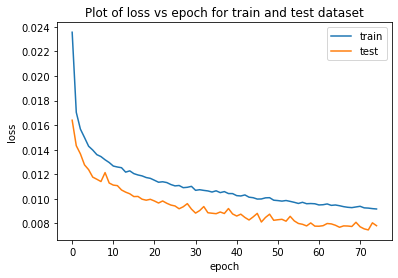

In [47]:
# Plot of loss vs epoch for train and test dataset
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# 5- TCN

### - TCN layer implementation

In [49]:
class TCN:
    def channel_normalization(self , x):
        max_values = K.max(K.abs(x), 2, keepdims=True) + 1e-5
        out = x / max_values
        return out

    def residual_block(self , x, s, i, activation, nb_filters, kernel_size, padding, dropout_rate=0, name=''):
        original_x = x
        conv = Conv1D(filters=nb_filters, kernel_size=kernel_size,
                      dilation_rate=i, padding=padding,
                      name=name + '_dilated_conv_%d_tanh_s%d' % (i, s))(x)
        if activation == 'norm_relu':
            x = Activation('relu')(conv)
            x = Lambda(self.channel_normalization)(x)
        else:
            x = Activation(activation)(conv)

        x = SpatialDropout1D(dropout_rate, name=name + '_spatial_dropout1d_%d_s%d_%f' % (i, s, dropout_rate))(x)

        # 1x1 conv.
        x = Convolution1D(nb_filters, 1, padding='same')(x)
        res_x = keras.layers.add([original_x, x])
        return res_x, x
    
    def __init__(self,
                 nb_filters=64,
                 kernel_size=2,
                 nb_stacks=1,
                 dilations=None,
                 activation='norm_relu',
                 padding='causal',
                 use_skip_connections=True,
                 dropout_rate=0.0,
                 return_sequences=True,
                 name='tcn'):
        self.name = name
        self.return_sequences = return_sequences
        self.dropout_rate = dropout_rate
        self.use_skip_connections = use_skip_connections
        self.activation = activation
        self.dilations = dilations
        self.nb_stacks = nb_stacks
        self.kernel_size = kernel_size
        self.nb_filters = nb_filters
        self.padding = padding
        
        if padding != 'causal' and padding != 'same':
            raise ValueError("Only 'causal' or 'same' paddings are compatible for this layer.")

        if not isinstance(nb_filters, int):
            print('An interface change occurred after the version 2.1.2.')
            print('Before: tcn.TCN(i, return_sequences=False, ...)')
            print('Now should be: tcn.TCN(return_sequences=False, ...)(i)')
            print('Second solution is to pip install keras-tcn==2.1.2 to downgrade.')
            raise Exception()

    def __call__(self, inputs):
        if self.dilations is None:
            self.dilations = [1, 2, 4, 8, 16, 32]
        x = inputs
        x = Convolution1D(self.nb_filters, 1, padding=self.padding, name=self.name + '_initial_conv')(x)
        skip_connections = []
        for s in range(self.nb_stacks):
            for i in self.dilations:
                x, skip_out = self.residual_block(x, s, i, self.activation, self.nb_filters,
                                             self.kernel_size, self.padding, self.dropout_rate, name=self.name)
                skip_connections.append(skip_out)
        if self.use_skip_connections:
            x = keras.layers.add(skip_connections)
        x = Activation('relu')(x)

        if not self.return_sequences:
            output_slice_index = -1
            x = Lambda(lambda tt: tt[:, output_slice_index, :])(x)
        return x

### - TCN Optuna

In [51]:
def objective(trial):
    
    tcn_units1  = trial.suggest_categorical("tcn_units1" , [ 16, 32 , 64 ])
    tcn_units2  = trial.suggest_categorical("tcn_units2" , [ 8, 16 , 32 ])
    dence_units = trial.suggest_categorical("dence_units", [ 10, 15 , 20 ])
    
    kernal_size1 = trial.suggest_categorical("kernal_size1", [ 4, 6, 8 ])
    kernal_size2 = trial.suggest_categorical("kernal_size2", [ 4, 6, 8 ])
    
    dropout1 = trial.suggest_categorical("dropout1", [ 0.2, 0.4 , 0.6 ])
    dropout2 = trial.suggest_categorical("dropout2", [ 0.2, 0.4 , 0.6 ])
    
    batch_size = trial.suggest_categorical("batch_size",[128, 256, 512])
    activation = trial.suggest_categorical("activation", ['relu','selu','sigmoid','linear','tanh','swish'])
    
    epochs = trial.suggest_categorical("epochs", [5, 10, 15])
    loss = trial.suggest_categorical("loss",['mse','mae'])
    
    
    inputs = Input(shape= (X_train.shape[1],X_train.shape[2]))    
    
    x = SpatialDropout1D(dropout1)(inputs)
    x = TCN(tcn_units1,dilations = [1, 2, 4, 8, 16],kernel_size = kernal_size1, return_sequences=True, name = 'tnc1')(x)
    x = TCN(tcn_units2,dilations = [1, 2, 4],kernel_size = kernal_size2, return_sequences=True, name = 'tnc2')(x)
    max_pool = GlobalMaxPooling1D()(x)
    x = Dense(dence_units, activation="relu")(max_pool)
    x = Dropout(dropout2)(x)
    output = Dense(2)(x)    
    model = Model(inputs= inputs , outputs=output)
    
    model.compile(loss= loss, optimizer='adam')
    
    
    model.fit(
        X_train,
        y_train,
        validation_data= (X_val,y_val), 
        shuffle= True,
        batch_size= batch_size,
        epochs= epochs,
        verbose= 0)
    y_pred = model.predict(X_test)
    loss = mean_squared_error(y_test, y_pred)
    return loss
    
    
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials= 25 ) 

[I 2022-11-06 01:59:03,957] A new study created in memory with name: no-name-3d578d8d-f732-4120-8277-849511544ef6


137/137 [==============================] - 1s 3ms/step


[I 2022-11-06 02:00:46,950] Trial 0 finished with value: 0.021746282441943536 and parameters: {'tcn_units1': 32, 'tcn_units2': 32, 'dence_units': 20, 'kernal_size1': 6, 'kernal_size2': 4, 'dropout1': 0.6, 'dropout2': 0.6, 'batch_size': 256, 'activation': 'swish', 'epochs': 15, 'loss': 'mse'}. Best is trial 0 with value: 0.021746282441943536.


137/137 [==============================] - 1s 2ms/step


[I 2022-11-06 02:01:28,239] Trial 1 finished with value: 0.022505325578633526 and parameters: {'tcn_units1': 16, 'tcn_units2': 8, 'dence_units': 10, 'kernal_size1': 4, 'kernal_size2': 6, 'dropout1': 0.6, 'dropout2': 0.6, 'batch_size': 256, 'activation': 'tanh', 'epochs': 15, 'loss': 'mse'}. Best is trial 0 with value: 0.021746282441943536.


137/137 [==============================] - 2s 8ms/step


[I 2022-11-06 02:04:05,673] Trial 2 finished with value: 0.020415132859483223 and parameters: {'tcn_units1': 64, 'tcn_units2': 32, 'dence_units': 10, 'kernal_size1': 6, 'kernal_size2': 4, 'dropout1': 0.6, 'dropout2': 0.4, 'batch_size': 128, 'activation': 'linear', 'epochs': 15, 'loss': 'mse'}. Best is trial 2 with value: 0.020415132859483223.


137/137 [==============================] - 1s 2ms/step


[I 2022-11-06 02:04:47,455] Trial 3 finished with value: 0.02165843320682262 and parameters: {'tcn_units1': 16, 'tcn_units2': 8, 'dence_units': 20, 'kernal_size1': 4, 'kernal_size2': 4, 'dropout1': 0.6, 'dropout2': 0.6, 'batch_size': 512, 'activation': 'linear', 'epochs': 15, 'loss': 'mse'}. Best is trial 2 with value: 0.020415132859483223.


137/137 [==============================] - 2s 8ms/step


[I 2022-11-06 02:06:43,629] Trial 4 finished with value: 0.0178317621947112 and parameters: {'tcn_units1': 64, 'tcn_units2': 16, 'dence_units': 10, 'kernal_size1': 6, 'kernal_size2': 4, 'dropout1': 0.4, 'dropout2': 0.4, 'batch_size': 512, 'activation': 'swish', 'epochs': 15, 'loss': 'mae'}. Best is trial 4 with value: 0.0178317621947112.


137/137 [==============================] - 2s 11ms/step


[I 2022-11-06 02:08:15,560] Trial 5 finished with value: 0.017336827321841334 and parameters: {'tcn_units1': 64, 'tcn_units2': 8, 'dence_units': 15, 'kernal_size1': 8, 'kernal_size2': 4, 'dropout1': 0.4, 'dropout2': 0.2, 'batch_size': 512, 'activation': 'linear', 'epochs': 10, 'loss': 'mse'}. Best is trial 5 with value: 0.017336827321841334.


137/137 [==============================] - 1s 3ms/step


[I 2022-11-06 02:09:20,076] Trial 6 finished with value: 0.01614519642856695 and parameters: {'tcn_units1': 32, 'tcn_units2': 32, 'dence_units': 15, 'kernal_size1': 6, 'kernal_size2': 6, 'dropout1': 0.2, 'dropout2': 0.4, 'batch_size': 128, 'activation': 'relu', 'epochs': 10, 'loss': 'mae'}. Best is trial 6 with value: 0.01614519642856695.


137/137 [==============================] - 2s 12ms/step


[I 2022-11-06 02:11:03,271] Trial 7 finished with value: 0.019909681914525135 and parameters: {'tcn_units1': 64, 'tcn_units2': 16, 'dence_units': 15, 'kernal_size1': 8, 'kernal_size2': 4, 'dropout1': 0.6, 'dropout2': 0.2, 'batch_size': 512, 'activation': 'relu', 'epochs': 10, 'loss': 'mse'}. Best is trial 6 with value: 0.01614519642856695.


137/137 [==============================] - 1s 3ms/step


[I 2022-11-06 02:12:07,069] Trial 8 finished with value: 0.015703217223807412 and parameters: {'tcn_units1': 32, 'tcn_units2': 32, 'dence_units': 15, 'kernal_size1': 4, 'kernal_size2': 8, 'dropout1': 0.2, 'dropout2': 0.2, 'batch_size': 128, 'activation': 'selu', 'epochs': 10, 'loss': 'mse'}. Best is trial 8 with value: 0.015703217223807412.


137/137 [==============================] - 1s 3ms/step


[I 2022-11-06 02:12:46,519] Trial 9 finished with value: 0.01752802503178509 and parameters: {'tcn_units1': 16, 'tcn_units2': 16, 'dence_units': 20, 'kernal_size1': 4, 'kernal_size2': 6, 'dropout1': 0.4, 'dropout2': 0.2, 'batch_size': 128, 'activation': 'tanh', 'epochs': 10, 'loss': 'mae'}. Best is trial 8 with value: 0.015703217223807412.


137/137 [==============================] - 1s 3ms/step


[I 2022-11-06 02:13:24,471] Trial 10 finished with value: 0.016910203154315583 and parameters: {'tcn_units1': 32, 'tcn_units2': 32, 'dence_units': 15, 'kernal_size1': 4, 'kernal_size2': 8, 'dropout1': 0.2, 'dropout2': 0.2, 'batch_size': 128, 'activation': 'selu', 'epochs': 5, 'loss': 'mae'}. Best is trial 8 with value: 0.015703217223807412.


137/137 [==============================] - 1s 4ms/step


[I 2022-11-06 02:14:47,208] Trial 11 finished with value: 0.016727721816610672 and parameters: {'tcn_units1': 32, 'tcn_units2': 32, 'dence_units': 15, 'kernal_size1': 6, 'kernal_size2': 8, 'dropout1': 0.2, 'dropout2': 0.4, 'batch_size': 128, 'activation': 'sigmoid', 'epochs': 10, 'loss': 'mae'}. Best is trial 8 with value: 0.015703217223807412.


137/137 [==============================] - 1s 3ms/step


[I 2022-11-06 02:16:07,542] Trial 12 finished with value: 0.01942114328532757 and parameters: {'tcn_units1': 32, 'tcn_units2': 32, 'dence_units': 15, 'kernal_size1': 6, 'kernal_size2': 6, 'dropout1': 0.2, 'dropout2': 0.4, 'batch_size': 128, 'activation': 'selu', 'epochs': 10, 'loss': 'mae'}. Best is trial 8 with value: 0.015703217223807412.


137/137 [==============================] - 1s 3ms/step


[I 2022-11-06 02:16:40,329] Trial 13 finished with value: 0.01591358760478747 and parameters: {'tcn_units1': 32, 'tcn_units2': 32, 'dence_units': 15, 'kernal_size1': 4, 'kernal_size2': 8, 'dropout1': 0.2, 'dropout2': 0.2, 'batch_size': 128, 'activation': 'relu', 'epochs': 5, 'loss': 'mae'}. Best is trial 8 with value: 0.015703217223807412.


137/137 [==============================] - 1s 3ms/step


[I 2022-11-06 02:17:13,762] Trial 14 finished with value: 0.01652486129527395 and parameters: {'tcn_units1': 32, 'tcn_units2': 32, 'dence_units': 15, 'kernal_size1': 4, 'kernal_size2': 8, 'dropout1': 0.2, 'dropout2': 0.2, 'batch_size': 128, 'activation': 'selu', 'epochs': 5, 'loss': 'mse'}. Best is trial 8 with value: 0.015703217223807412.


137/137 [==============================] - 1s 3ms/step


[I 2022-11-06 02:17:50,084] Trial 15 finished with value: 0.015435382216776854 and parameters: {'tcn_units1': 32, 'tcn_units2': 32, 'dence_units': 15, 'kernal_size1': 4, 'kernal_size2': 8, 'dropout1': 0.2, 'dropout2': 0.2, 'batch_size': 128, 'activation': 'relu', 'epochs': 5, 'loss': 'mae'}. Best is trial 15 with value: 0.015435382216776854.


137/137 [==============================] - 1s 3ms/step


[I 2022-11-06 02:18:21,905] Trial 16 finished with value: 0.015258787048481444 and parameters: {'tcn_units1': 32, 'tcn_units2': 32, 'dence_units': 15, 'kernal_size1': 4, 'kernal_size2': 8, 'dropout1': 0.2, 'dropout2': 0.2, 'batch_size': 256, 'activation': 'sigmoid', 'epochs': 5, 'loss': 'mse'}. Best is trial 16 with value: 0.015258787048481444.


137/137 [==============================] - 1s 3ms/step


[I 2022-11-06 02:18:51,369] Trial 17 finished with value: 0.01651523988015392 and parameters: {'tcn_units1': 32, 'tcn_units2': 32, 'dence_units': 15, 'kernal_size1': 4, 'kernal_size2': 8, 'dropout1': 0.2, 'dropout2': 0.2, 'batch_size': 256, 'activation': 'sigmoid', 'epochs': 5, 'loss': 'mae'}. Best is trial 16 with value: 0.015258787048481444.


137/137 [==============================] - 1s 3ms/step


[I 2022-11-06 02:19:23,758] Trial 18 finished with value: 0.018829259038898725 and parameters: {'tcn_units1': 32, 'tcn_units2': 8, 'dence_units': 10, 'kernal_size1': 8, 'kernal_size2': 8, 'dropout1': 0.2, 'dropout2': 0.2, 'batch_size': 256, 'activation': 'sigmoid', 'epochs': 5, 'loss': 'mse'}. Best is trial 16 with value: 0.015258787048481444.


137/137 [==============================] - 1s 2ms/step


[I 2022-11-06 02:19:44,354] Trial 19 finished with value: 0.018626410667938072 and parameters: {'tcn_units1': 16, 'tcn_units2': 16, 'dence_units': 20, 'kernal_size1': 4, 'kernal_size2': 8, 'dropout1': 0.2, 'dropout2': 0.2, 'batch_size': 256, 'activation': 'sigmoid', 'epochs': 5, 'loss': 'mae'}. Best is trial 16 with value: 0.015258787048481444.


### - TCN (Optimal parameters)

In [52]:
print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))
    

Number of finished trials: 20
Best trial:
  Value: 0.015258787048481444
  Params: 
    tcn_units1: 32
    tcn_units2: 32
    dence_units: 15
    kernal_size1: 4
    kernal_size2: 8
    dropout1: 0.2
    dropout2: 0.2
    batch_size: 256
    activation: sigmoid
    epochs: 5
    loss: mse


### - TCN Run (optimal paramters)

In [54]:
inputs = Input(shape=X_train.shape[1:])

try:
    output = y_train.shape[1]
except:
    output = 1


x = SpatialDropout1D(trial.params["dropout1"])(inputs)
x = TCN(trial.params["tcn_units1"],dilations = [1, 2, 4, 8, 16],kernel_size = trial.params["kernal_size1"], return_sequences=True, name = 'tnc1')(x)
x = TCN(trial.params["tcn_units2"],dilations = [1, 2, 4],kernel_size = trial.params["kernal_size2"], return_sequences=True, name = 'tnc2')(x)
max_pool = GlobalMaxPooling1D()(x)
x = Dense(trial.params["dence_units"], activation=trial.params["activation"])(max_pool)
x = Dropout(trial.params["dropout2"])(x)
output = Dense(output)(x)    
model = Model(inputs= inputs , outputs=output)


model.compile(loss =trial.params["loss"] , optimizer='adam')

model.summary()


history = model.fit(X_train,
                    y_train, 
                    batch_size= trial.params["batch_size"] , 
                    epochs= trial.params["epochs"], 
                    verbose= 1,  
                    validation_split=0.3, 
                    callbacks= callback)

Model: "model_20"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_21 (InputLayer)          [(None, 1, 84)]      0           []                               
                                                                                                  
 spatial_dropout1d_20 (SpatialD  (None, 1, 84)       0           ['input_21[0][0]']               
 ropout1D)                                                                                        
                                                                                                  
 tnc1_initial_conv (Conv1D)     (None, 1, 32)        2720        ['spatial_dropout1d_20[0][0]']   
                                                                                                  
 tnc1_dilated_conv_1_tanh_s0 (C  (None, 1, 32)       4128        ['tnc1_initial_conv[0][0]'

In [55]:
train_results = model.evaluate(X_train, y_train)
test_results  = model.evaluate(X_test, y_test)



y_pred_train = model.predict(X_train)
y_pred_test  = model.predict(X_test)

137/137 [==============================] - 0s 3ms/step


In [56]:
print("*" * 40)
print(" Train ".center(40,"-"))
print("*" * 40)

print("Mean absolute error ----------->", round(mean_absolute_error(y_train.flatten(),y_pred_train.flatten()),5))
print("Mean squared error ------------>", round(mean_squared_error(y_train.flatten(),y_pred_train.flatten()),5))
print("Root mean squared error ------->", round(sqrt(mean_squared_error(y_train.flatten(),y_pred_train.flatten())),5))
print("Root mean squared log error --->", round(log(sqrt(mean_squared_error(y_train.flatten(),y_pred_train.flatten()))),5),sep="")
print("R squared  -------------------->", round(r2_score(y_train.flatten(),y_pred_train.flatten()),5))

print("\n","*" * 40,sep="")
print(" Test ".center(40,"-"))
print("*" * 40)

print("Mean absolute error ----------->", round(mean_absolute_error(y_test.flatten(),y_pred_test.flatten()),5))
print("Mean squared error ------------>", round(mean_squared_error(y_test.flatten(),y_pred_test.flatten()),5))
print("Root mean squared error ------->", round(sqrt(mean_squared_error(y_test.flatten(),y_pred_test.flatten())),5))
print("Root mean squared log error --->", round(log(sqrt(mean_squared_error(y_test.flatten(),y_pred_test.flatten()))),5),sep="")
print("R squared  -------------------->", round(r2_score(y_test.flatten(),y_pred_test.flatten()),5))

****************************************
---------------- Train -----------------
****************************************
Mean absolute error -----------> 0.08812
Mean squared error ------------> 0.01792
Root mean squared error -------> 0.13386
Root mean squared log error --->-2.01094
R squared  --------------------> 0.60664

****************************************
----------------- Test -----------------
****************************************
Mean absolute error -----------> 0.08826
Mean squared error ------------> 0.01768
Root mean squared error -------> 0.13296
Root mean squared log error --->-2.01773
R squared  --------------------> 0.59971


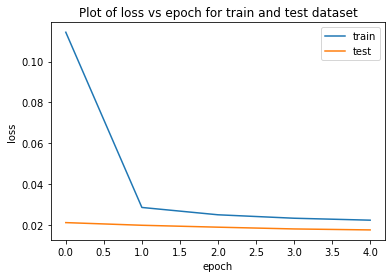

In [57]:
# Plot of loss vs epoch for train and test dataset
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

### 

# Models losses

### DNN loss

In [ ]:
"""
****************************************
---------------- Train -----------------
****************************************
Mean absolute error -----------> 0.0497
Mean squared error ------------> 0.00608
Root mean squared error -------> 0.07798
Root mean squared log error --->-2.55136
R squared  --------------------> 0.86653

****************************************
----------------- Test -----------------
****************************************
Mean absolute error -----------> 0.05386
Mean squared error ------------> 0.00713
Root mean squared error -------> 0.08447
Root mean squared log error --->-2.4714
R squared  --------------------> 0.83844
"""

### LSTM loss

In [ ]:
"""
****************************************
---------------- Train -----------------
****************************************
Mean absolute error -----------> 0.04625
Mean squared error ------------> 0.00558
Root mean squared error -------> 0.07468
Root mean squared log error --->-2.59458
R squared  --------------------> 0.87758

****************************************
----------------- Test -----------------
****************************************
Mean absolute error -----------> 0.0509
Mean squared error ------------> 0.00666
Root mean squared error -------> 0.08158
Root mean squared log error --->-2.50614
R squared  --------------------> 0.84929
"""

### CNN loss

In [ ]:
"""
****************************************
---------------- Train -----------------
****************************************
Mean absolute error -----------> 0.07072
Mean squared error ------------> 0.01063
Root mean squared error -------> 0.10309
Root mean squared log error --->-2.27219
R squared  --------------------> 0.76672

****************************************
----------------- Test -----------------
****************************************
Mean absolute error -----------> 0.0719
Mean squared error ------------> 0.01091
Root mean squared error -------> 0.10447
Root mean squared log error --->-2.25883
R squared  --------------------> 0.75285
"""

### GRU

In [ ]:
"""
****************************************
---------------- Train -----------------
****************************************
Mean absolute error -----------> 0.05413
Mean squared error ------------> 0.00728
Root mean squared error -------> 0.08534
Root mean squared log error --->-2.46112
R squared  --------------------> 0.84013

****************************************
----------------- Test -----------------
****************************************
Mean absolute error -----------> 0.05664
Mean squared error ------------> 0.00796
Root mean squared error -------> 0.08923
Root mean squared log error --->-2.41658
R squared  --------------------> 0.81972
"""

### TCN loss

In [ ]:
"""
****************************************
---------------- Train -----------------
****************************************
Mean absolute error -----------> 0.08812
Mean squared error ------------> 0.01792
Root mean squared error -------> 0.13386
Root mean squared log error --->-2.01094
R squared  --------------------> 0.60664

****************************************
----------------- Test -----------------
****************************************
Mean absolute error -----------> 0.08826
Mean squared error ------------> 0.01768
Root mean squared error -------> 0.13296
Root mean squared log error --->-2.01773
R squared  --------------------> 0.59971
"""

### 

## As we see (LSTM model) has the least loss , so we're using Xia on it

In [91]:
model = Sequential()
model.add(LSTM(units=200, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=100, return_sequences=True))
model.add(Flatten())
model.add(Dense(units=50,activation='relu'))
model.add(Dense(2))

model.compile(
    loss='mse',
    optimizer= Adam()
)


history = model.fit(X_train , 
                    y_train, 
                    epochs= 100, 
                    batch_size= 256, 
                    verbose= 1,
                    validation_data= (X_val, y_val), 
                   )


Train on 35059 samples, validate on 4382 samples
Epoch 1/100
35059/35059 [==============================] - 5s 146us/sample - loss: 0.0224 - val_loss: 0.0166
Epoch 2/100
35059/35059 [==============================] - 4s 105us/sample - loss: 0.0160 - val_loss: 0.0156
Epoch 3/100
35059/35059 [==============================] - 4s 105us/sample - loss: 0.0144 - val_loss: 0.0135
Epoch 4/100
35059/35059 [==============================] - 4s 103us/sample - loss: 0.0137 - val_loss: 0.0137
Epoch 5/100
35059/35059 [==============================] - 4s 103us/sample - loss: 0.0132 - val_loss: 0.0128
Epoch 6/100
35059/35059 [==============================] - 4s 103us/sample - loss: 0.0128 - val_loss: 0.0124
Epoch 7/100
35059/35059 [==============================] - 4s 102us/sample - loss: 0.0127 - val_loss: 0.0121
Epoch 8/100
35059/35059 [==============================] - 4s 102us/sample - loss: 0.0126 - val_loss: 0.0134
Epoch 9/100
35059/35059 [==============================] - 4s 103us/sample - lo

In [92]:
import shap

explainer = shap.DeepExplainer(model, X_train[:100])
shap_values = explainer.shap_values(X_test[:100])

In [93]:
shap.initjs()

shap.force_plot(explainer.expected_value[0], shap_values[0][0], X_test[0])

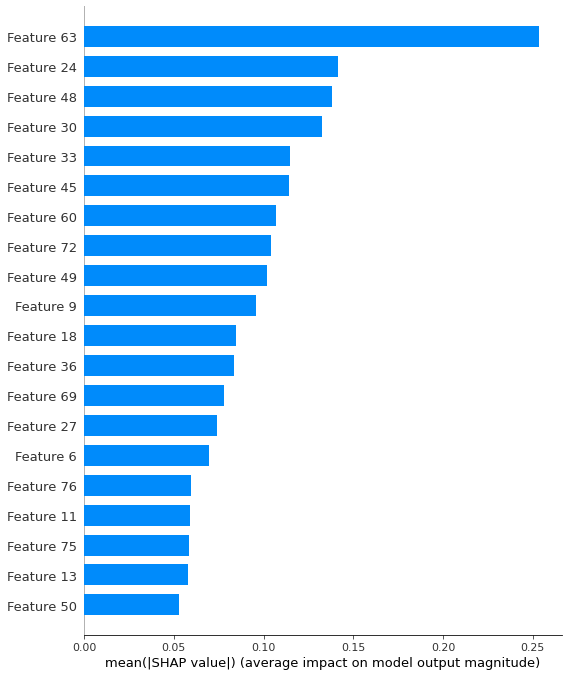

In [94]:
shap.summary_plot(shap_values[0][0], plot_type = 'bar')

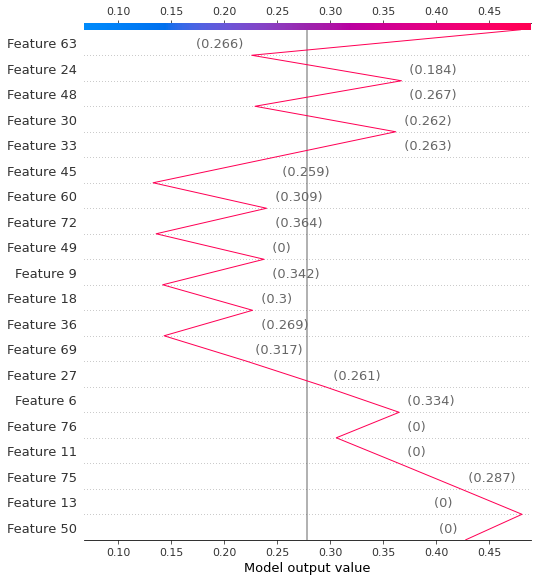

In [95]:
shap.decision_plot(explainer.expected_value[0], shap_values[0][0], features = X_test[0,:])

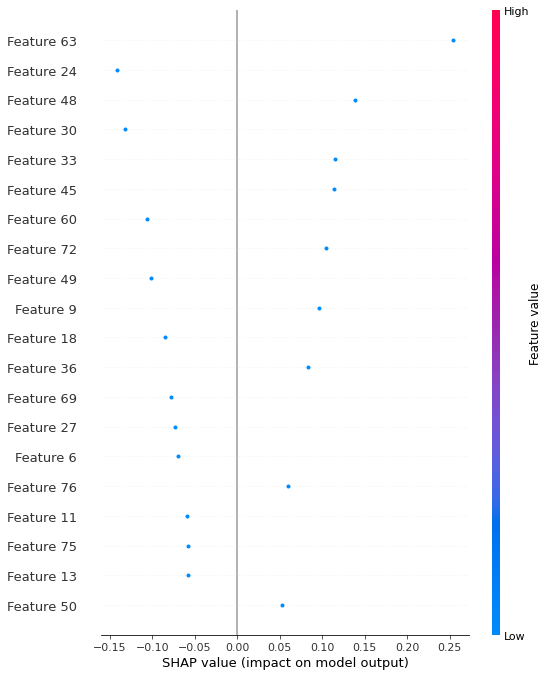

In [96]:
shap.summary_plot(shap_values[0][0], X_test[0],title="SHAP summary plot")

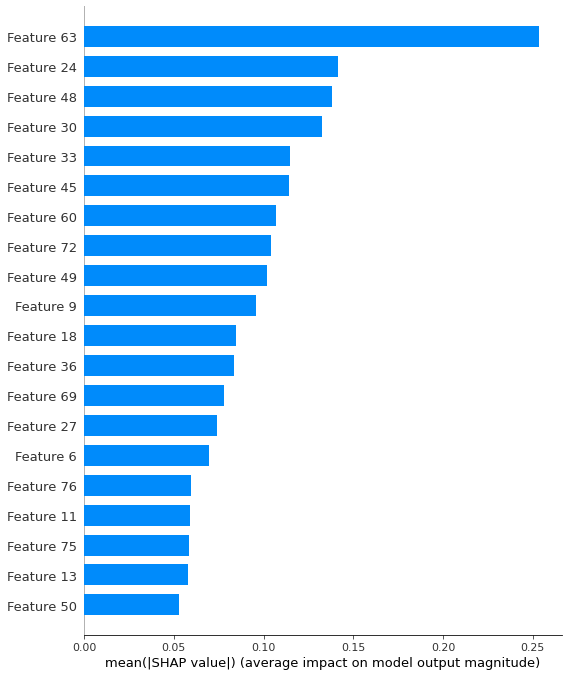

In [97]:
shap.summary_plot(shap_values[0][0], X_test[0],plot_type="bar")

In [ ]:
## lime code ..